We see that our dataset is mad of $n=300$ and $p=10$. These are its main features. Let's consider the subset.

In [17]:
 load("cuore.RData")
ls()
names(cuore)
 mydata<-cuore
summary(mydata)
dim(mydata)
mydata<-mydata[,c("infarto","familiarita", "colesterolo","carattere","tabacco")]

# verifica correttezza subset:
mydata[1:3,]

#verifica dimensione subset:
dim(mydata)

## AGGIUNGERE VARIABILE
#taking <- rep(1, length(mydata$budget))

## substitute 0 to the ones corresponding to cars with mpg lower than the med
#taking [mydata$box<20000000]=0
## create the dataset we need


#if you want to add a new variable into a mydata
#mydata<-data.frame(taking=taking ,mydata[,c("budget", "action", "cmngsoon")])
#mydata[1:3,]

mydata$familiarita<-as.factor(mydata$familiarita)
mydata$tabacco<-as.factor(mydata$tabacco)
mydata$infarto<-as.factor(mydata$infarto)

[1] "cuore"  "mydata"

[1] "pressione"   "colesterolo" "adiposita"   "familiarita" "carattere"  
 [6] "bmi"         "alcolici"    "anni"        "infarto"     "tabacco"

   pressione      colesterolo       adiposita     familiarita   carattere    
 Min.   :101.0   Min.   : 0.980   Min.   : 9.37   No:183      Min.   :13.00  
 1st Qu.:122.0   1st Qu.: 3.368   1st Qu.:18.96   Si:117      1st Qu.:48.00  
 Median :133.0   Median : 4.440   Median :25.79               Median :54.00  
 Mean   :135.8   Mean   : 4.829   Mean   :24.98               Mean   :54.23  
 3rd Qu.:144.0   3rd Qu.: 5.928   3rd Qu.:30.87               3rd Qu.:61.00  
 Max.   :208.0   Max.   :15.330   Max.   :42.49               Max.   :78.00  
      bmi           alcolici             anni          infarto      
 Min.   :17.75   Min.   :  0.0000   Min.   :15.00   Min.   :0.0000  
 1st Qu.:22.76   1st Qu.:  0.1425   1st Qu.:30.00   1st Qu.:0.0000  
 Median :25.69   Median :  5.7050   Median :44.00   Median :0.0000  
 Mean   :26.01   Mean   : 14.7379   Mean   :42.22   Mean   :0.3667  
 3rd Qu.:28.38   3rd Qu.: 19.5175   3rd Qu.:55.00   3rd Qu.:1.0000  
 Max.   :46.58   Max.   :147.1900   Max.

[1] 300  10

infarto,familiarita,colesterolo,carattere,tabacco
1,Si,5.73,49,Alto
1,No,4.41,55,Basso
0,Si,3.48,52,Basso


[1] 300   5

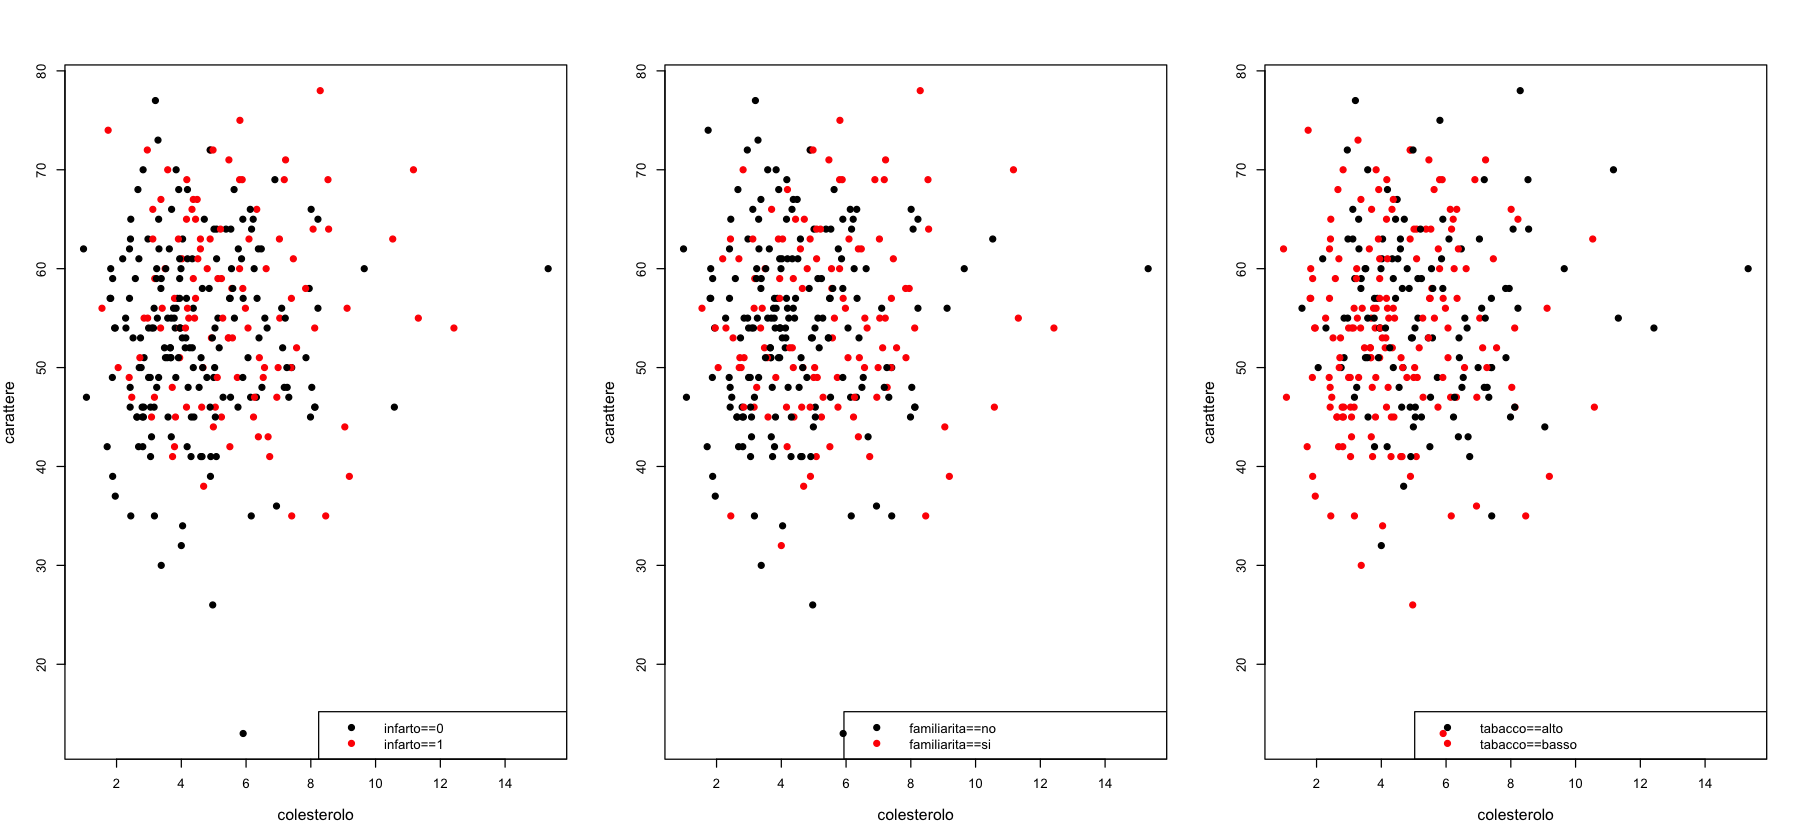

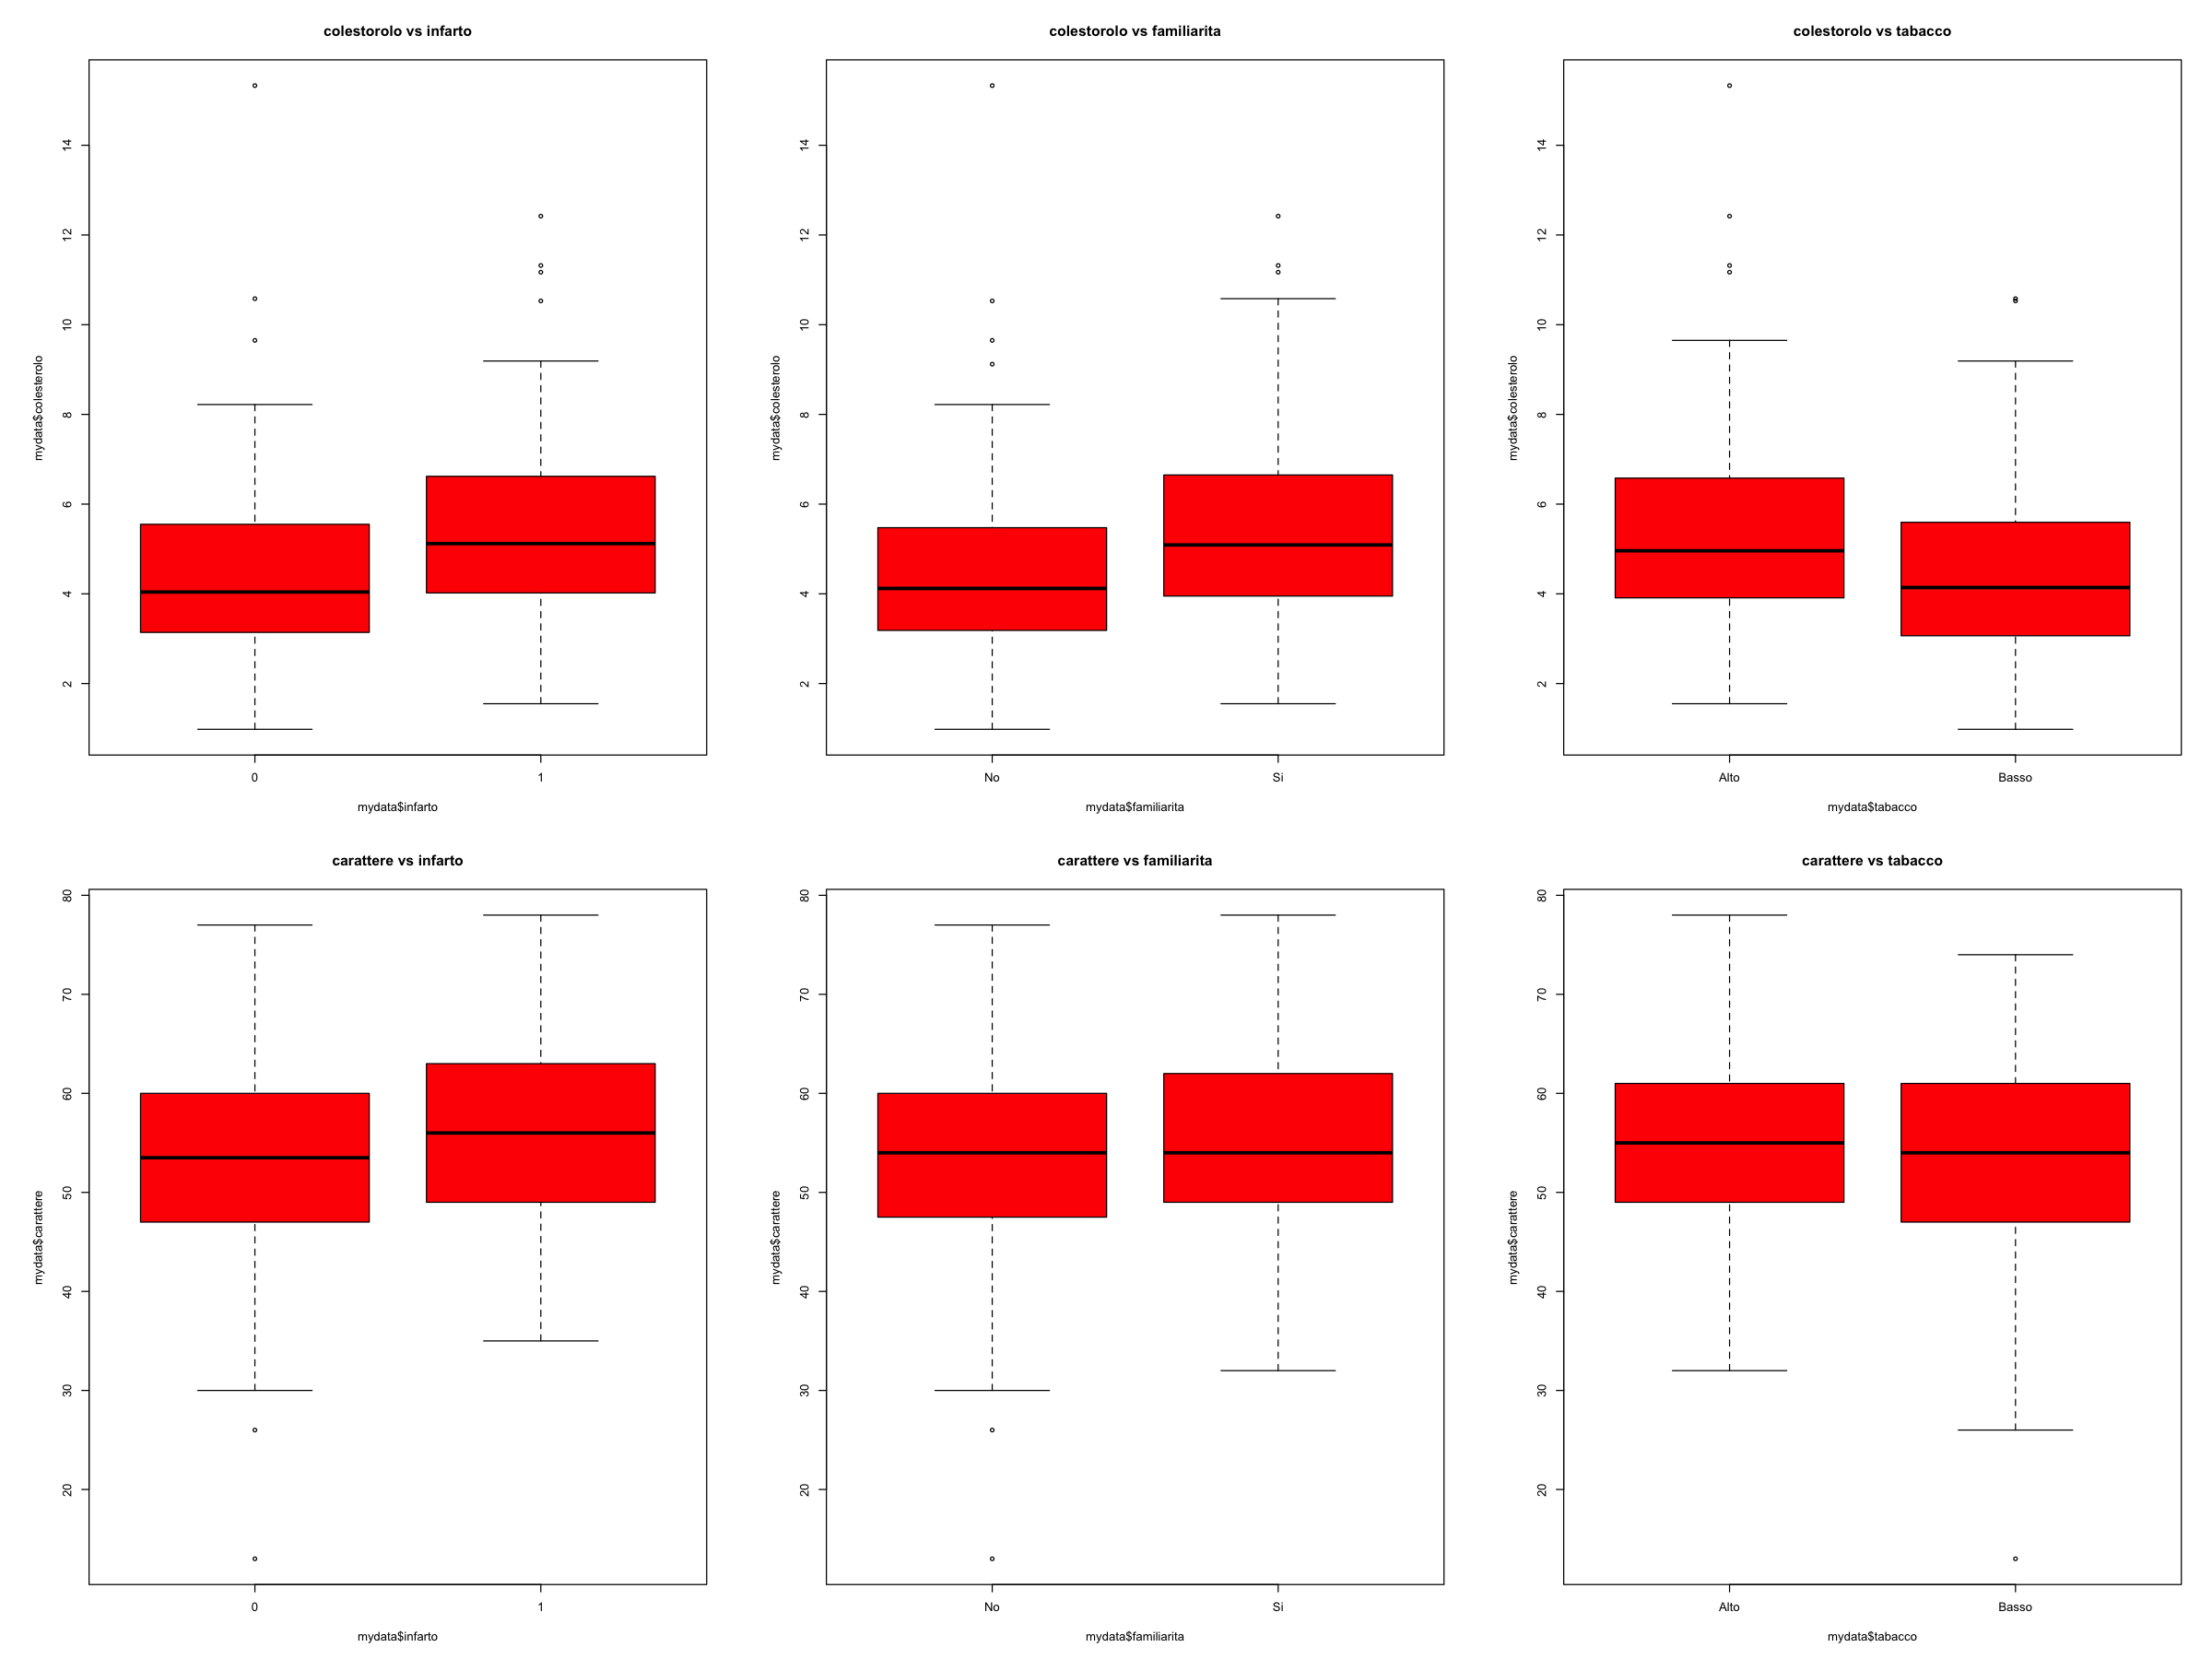

In [21]:

## plot con tutte le variabili in funzione di y per vedere eventuale relazione

##plot per verificare eventuali interazioni, nel caso di variabili di tipo YES/NO o livelli o classe insomme
par(mfrow=c(1,3))
options(repr.plot.width = 15, repr.plot.height = 7)

plot(mydata$colesterolo, mydata$carattere, cex.lab=1.2,pch=19, xlab='colesterolo', ylab='carattere',col=mydata$infarto)
legend("bottomright", col=c(1,2), pch=c(19,19),
        legend=c('infarto==0','infarto==1'))

plot(mydata$colesterolo, mydata$carattere, cex.lab=1.2,pch=19, xlab='colesterolo', ylab='carattere',col=mydata$familiarita)
legend("bottomright", col=c(1,2), pch=c(19,19),
        legend=c('familiarita==no','familiarita==si'))


plot(mydata$colesterolo, mydata$carattere, cex.lab=1.2,pch=19, xlab='colesterolo', ylab='carattere',col=mydata$tabacco)
legend("bottomright", col=c(1,2), pch=c(19,19),
        legend=c('tabacco==alto','tabacco==basso'))
options(repr.plot.width = 20, repr.plot.height = 15)
    par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(2,3))

#plot variabile X contro prima variabile dichotomica
 boxplot(mydata$colesterolo ~mydata$infarto, main="colestorolo vs infarto",  col="red")

 boxplot(mydata$colesterolo ~mydata$familiarita, main="colestorolo vs familiarita",  col="red")

 boxplot(mydata$colesterolo ~mydata$tabacco, main="colestorolo vs tabacco",  col="red")



#plot variabile X contro prima variabile dichotomica
 boxplot(mydata$carattere ~mydata$infarto, main="carattere vs infarto",  col="red")

 boxplot(mydata$carattere ~mydata$familiarita, main="carattere vs familiarita",  col="red")

 boxplot(mydata$carattere~mydata$tabacco, main="carattere vs tabacco",  col="red")



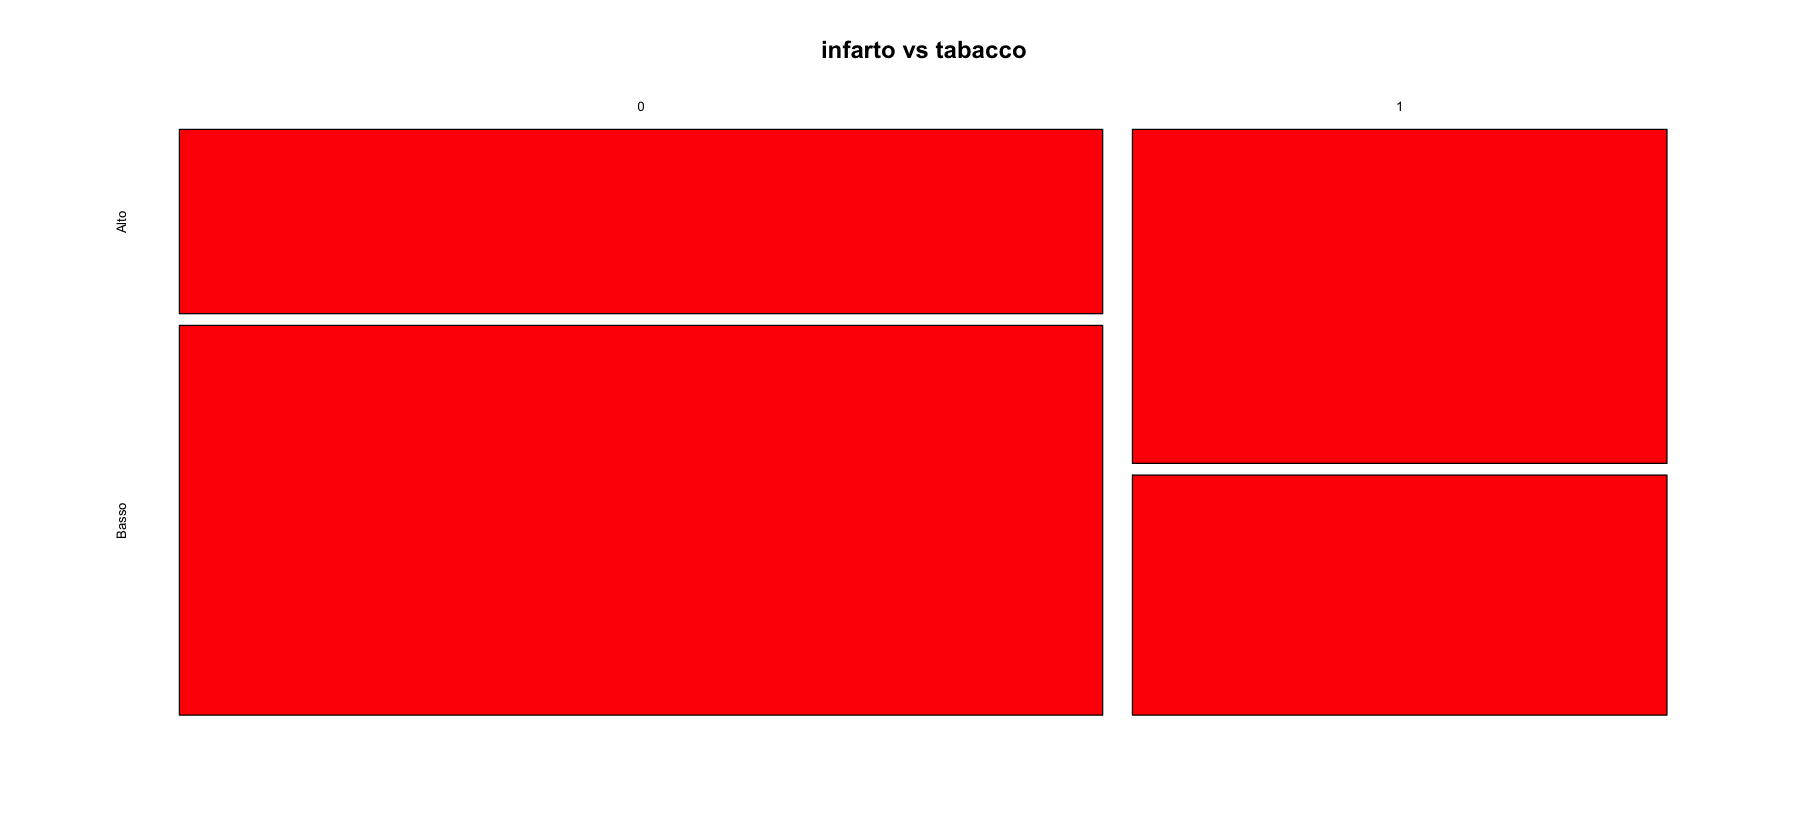

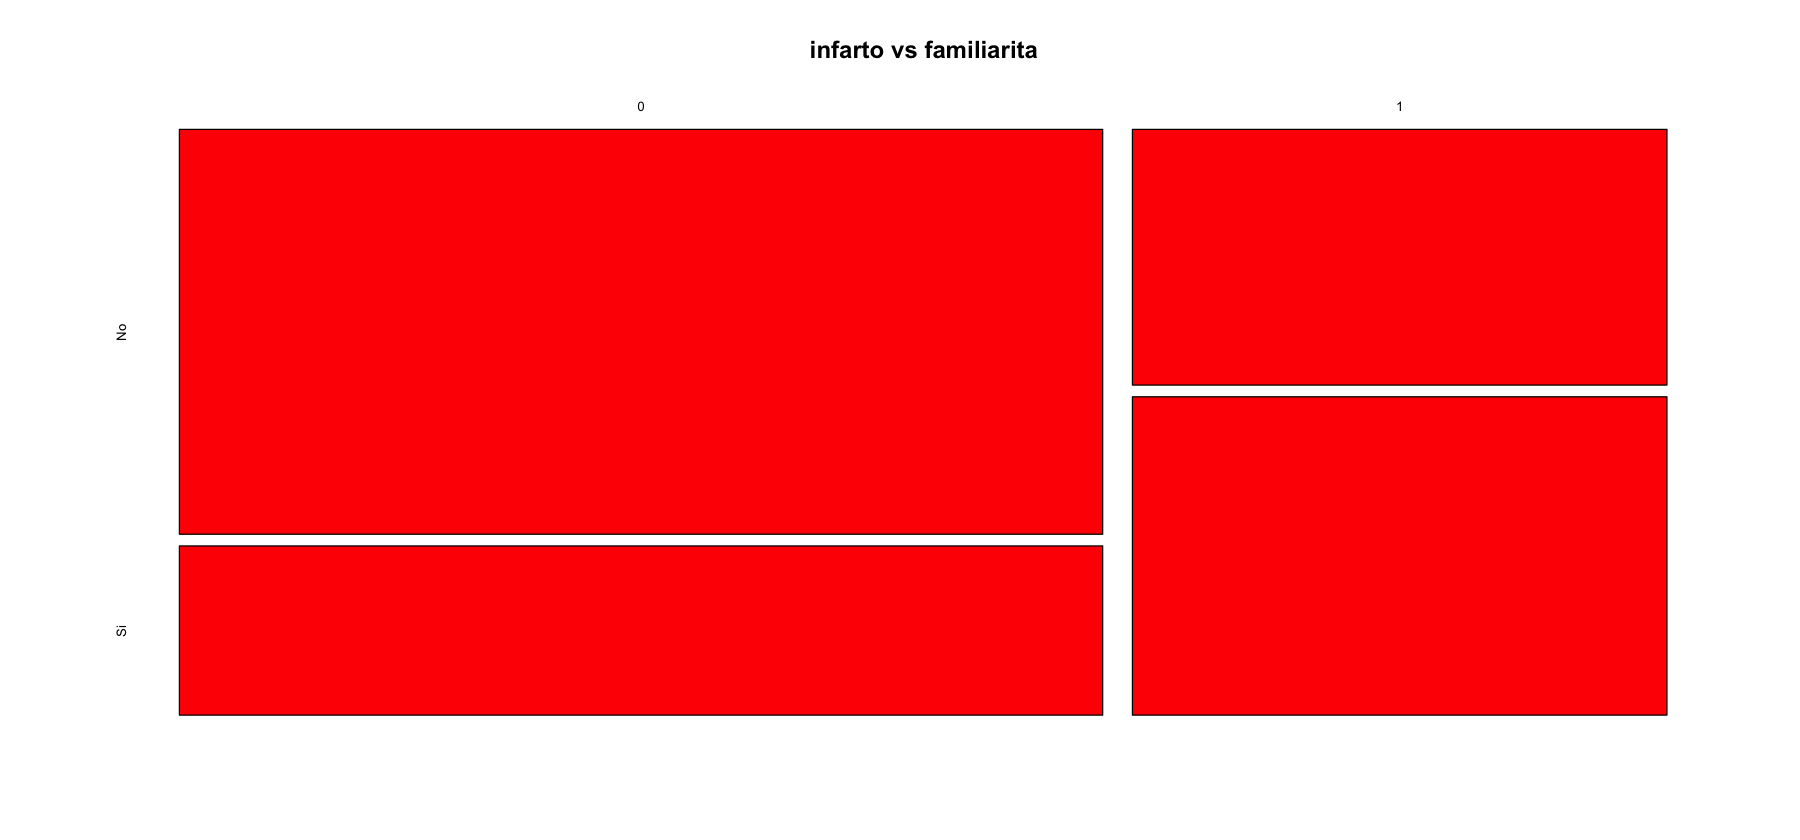

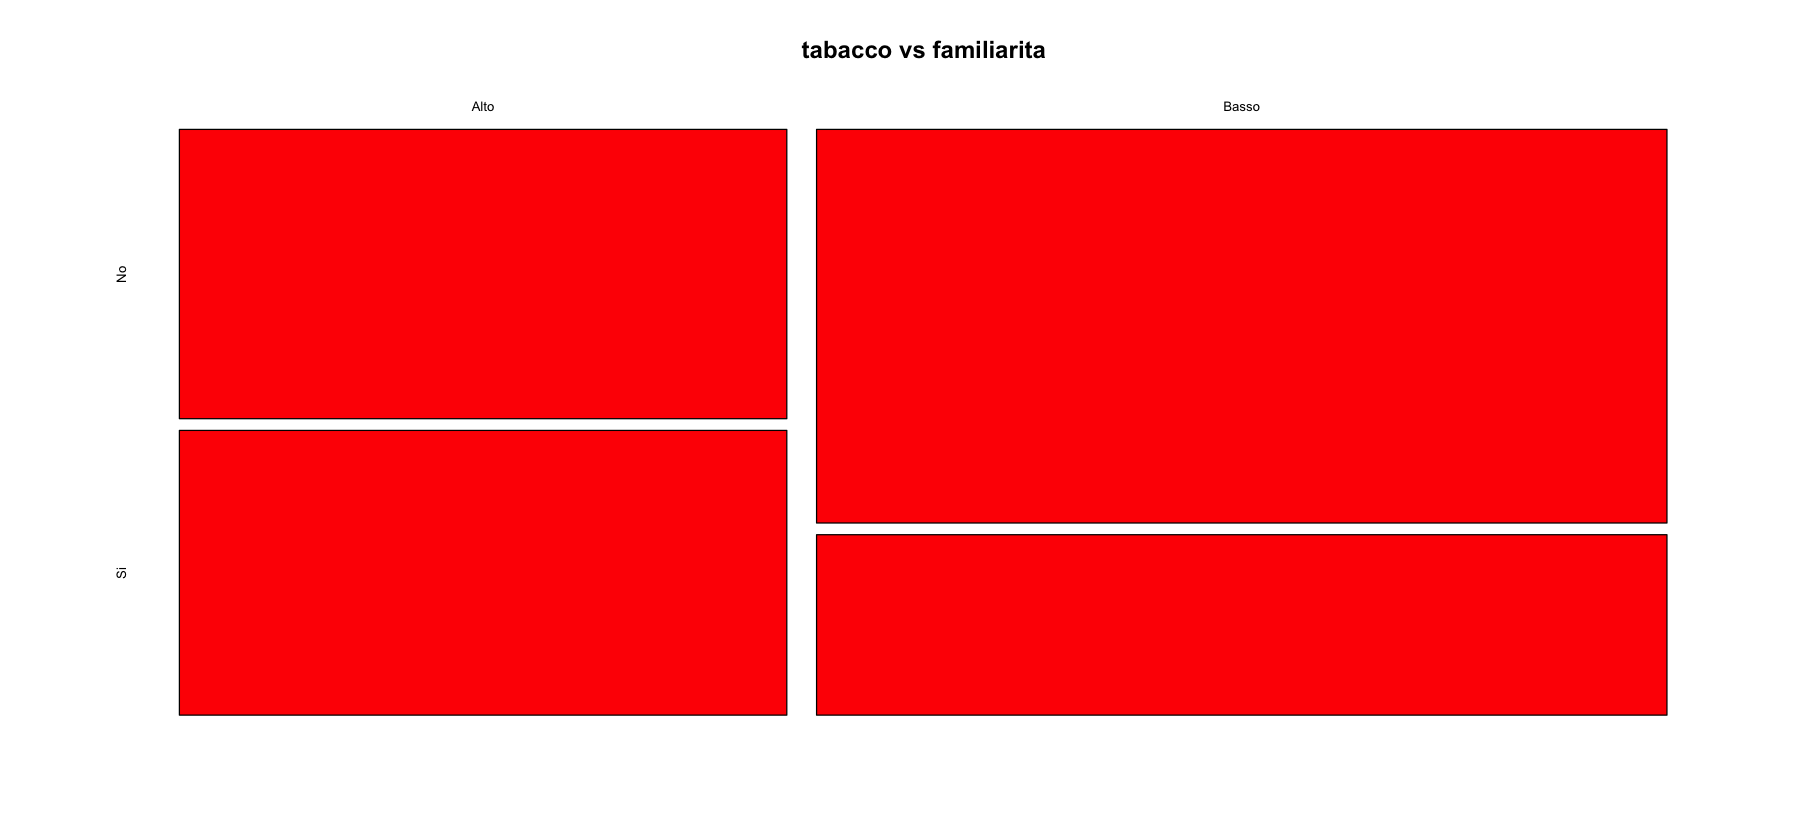

In [22]:
options(repr.plot.width = 15, repr.plot.height = 7)
mosaicplot(table(mydata$infarto, mydata$tabacco), main='infarto vs tabacco',col="red")
##COMMENTARE RISULTATI

options(repr.plot.width = 15, repr.plot.height = 7)
mosaicplot(table(mydata$infarto, mydata$familiarita), main='infarto vs familiarita',col="red")

options(repr.plot.width = 15, repr.plot.height = 7)
mosaicplot(table(mydata$tabacco, mydata$familiarita), main='tabacco vs familiarita',col="red")

In all the scatterplot of carattere vs colesterolo with infarto,tabacco,familiarita we see a partial overlapping between variables meaning that probabbly there would not be interactions.



In the boxplots we see:
- first boxplot: with infarto=1 a bit higher colesterolo. In both boxplots we see outliers
- second boxplot: with familiarita=1 a bit higher colesterolo. In both boxplots we see outliers
- third boxplot: with tabacco=alto a bit higher colesterolo. In both boxplots we see outliers

In the other boxplots the median are almost the same.
The first three boxplots maybe suggest interactions but we have to check it. The last three might not (medians are almost equal) but better check it.

We also see a mosaic plot of qualitative variables.


### LOGISTIC REGRESSION MODEL

Let's perform logistic regression model

In [31]:
# regression fit with all covariates and interactions of them
 model.mydata<- glm( infarto ~ colesterolo*familiarita+colesterolo*tabacco+colesterolo*carattere+tabacco*familiarita+ carattere*familiarita+carattere*tabacco, data=mydata, family=binomial)

# result of the regression fit
# summary (model.mydata)

model.mydata2 <- update(model.mydata, .~.-colesterolo:carattere)
# summary (model.mydata2)

model.mydata3 <- update(model.mydata2, .~.-colesterolo:familiarita)
#summary (model.mydata3)

model.mydata4 <- update(model.mydata3, .~.-tabacco:familiarita)
#summary (model.mydata4)

model.mydata5 <- update(model.mydata4, .~.-familiarita:carattere-tabacco:carattere)
#summary (model.mydata5)

model.mydata6 <- update(model.mydata5, .~.-colesterolo:tabacco)
summary (model.mydata6)


Call:
glm(formula = infarto ~ colesterolo + familiarita + tabacco + 
    carattere, family = binomial, data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8516  -0.9190  -0.5972   1.0773   2.0551  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.29103    0.91292  -3.605 0.000312 ***
colesterolo    0.17138    0.06798   2.521 0.011696 *  
familiaritaSi  0.86188    0.26458   3.257 0.001124 ** 
tabaccoBasso  -0.82012    0.26268  -3.122 0.001795 ** 
carattere      0.03632    0.01458   2.490 0.012762 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 394.29  on 299  degrees of freedom
Residual deviance: 347.35  on 295  degrees of freedom
AIC: 357.35

Number of Fisher Scoring iterations: 4


We start with a model with all covariates and all interactions, and we and with the model displayed in the output above (  infarto= -3.29 + 0.17colesterolo + 0.86familiaritasi -0.82 tabaccobasso + 0.04carattere) using model selection. The selection was made based on P-value. In table there is also the comparison between initial and final model using anova and 'Chisq' test.

In [32]:
anova( model.mydata, model.mydata6,test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
289,334.5059,NA,NA,NA
295,347.3455,-6,-12.83958,0.04565528


Let's try with smooth splines for colesterolo and carattere. The seed is set = 111. From the following output we see that we don't need splines. (I report just the output with both splines for carattere and colesterolo, but trying with just one of the leads to the same result). In fact Based  AIC for model without splines is lower.

In [34]:
set.seed(111)
library(gam)
## CONSIDERA LE VARIABILI NON LINEARI
x1.cv = smooth.spline(x= mydata$carattere, y=mydata$infarto, cv=TRUE)
x1.cv 
x2.cv = smooth.spline(x= mydata$colesterolo, y=mydata$infarto, cv=TRUE)
x2.cv 


## primo fit considerando le variabili splines smooth
m.gam <- gam(infarto ~ s(colesterolo,16) + familiarita + tabacco + 
    s(carattere,3),family="binomial",
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam)

Warning message in smooth.spline(x = mydata$carattere, y = mydata$infarto, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

Call:
smooth.spline(x = mydata$carattere, y = mydata$infarto, cv = TRUE)

Smoothing Parameter  spar= 0.8906429  lambda= 0.0572 (12 iterations)
Equivalent Degrees of Freedom (Df): 3.377494
Penalized Criterion (RSS): 9.86204
PRESS(l.o.o. CV): 0.2284255

Warning message in smooth.spline(x = mydata$colesterolo, y = mydata$infarto, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

Call:
smooth.spline(x = mydata$colesterolo, y = mydata$infarto, cv = TRUE)

Smoothing Parameter  spar= 0.7562456  lambda= 2.682461e-05 (11 iterations)
Equivalent Degrees of Freedom (Df): 16.56536
Penalized Criterion (RSS): 50.21756
PRESS(l.o.o. CV): 0.228981

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


Call: gam(formula = infarto ~ s(colesterolo, 16) + familiarita + tabacco + 
    s(carattere, 3), family = "binomial", data = mydata)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-1.7427 -0.9062 -0.5409  1.0237  2.2570 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 394.2947 on 299 degrees of freedom
Residual Deviance: 327.9788 on 278.0008 degrees of freedom
AIC: 371.9773 

Number of Local Scoring Iterations: 9 

Anova for Parametric Effects
                    Df  Sum Sq Mean Sq F value   Pr(>F)   
s(colesterolo, 16)   1   9.979  9.9785  9.7580 0.001974 **
familiarita          1   8.981  8.9805  8.7820 0.003306 **
tabacco              1   9.598  9.5981  9.3860 0.002401 **
s(carattere, 3)      1   6.406  6.4055  6.2639 0.012896 * 
Residuals          278 284.285  1.0226                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
                   Npar Df Npar Chisq P(Chi)
(Interce

We can see it also from training error of our model obtained befor rate that is equal to 31% 

- training error rate is: 92/300
- sensitivity is: 43/110
- specitivity is: 165/190

In [48]:

#estimate values
est.values<-predict(model.mydata6)
#est.values

#estimate probability
est.probs<-predict(model.mydata6,type="response")
#est.probs

preds<-rep(0,nrow(mydata))
preds[est.probs>0.5]<-1
addmargins(table(preds,infarto=mydata$infarto))

,0,1,Sum
0,165,67,232
1,25,43,68
Sum,190,110,300


Let's now select a training set consider 60% of data and test set with 40% and evaluate the model we obtained. The seed is set to 222.

In [49]:
n<-nrow(mydata)
set.seed(222)
selection <- sample(n, 0.60*n, replace=FALSE)


#training and test

training.set <- mydata[selection, ]
test.set <- mydata[-selection, ]

## fit the model with the training set

model.mydata.train <- glm( infarto ~ colesterolo + familiarita + tabacco + 
    carattere, data=training.set, family="binomial")
summary(model.mydata.train)

### prediction based on test set

probs.test <- predict(model.mydata.train, newdata=test.set, type='response')
preds.test <- rep(0, length(probs.test))
preds.test[probs.test>0.5] <- 1


Call:
glm(formula = infarto ~ colesterolo + familiarita + tabacco + 
    carattere, family = "binomial", data = training.set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7501  -0.8931  -0.5131   0.9601   2.1200  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.31595    1.18135  -2.807 0.005002 ** 
colesterolo    0.14167    0.08497   1.667 0.095467 .  
familiaritaSi  1.23592    0.34601   3.572 0.000354 ***
tabaccoBasso  -1.00983    0.35628  -2.834 0.004591 ** 
carattere      0.04053    0.01893   2.141 0.032237 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 241.45  on 179  degrees of freedom
Residual deviance: 199.52  on 175  degrees of freedom
AIC: 209.52

Number of Fisher Scoring iterations: 4


Let's check the test error rate, sensitivity and specitivity.

In [50]:
addmargins(table(preds.test, infarto=test.set$infarto))

,0,1,Sum
0,61,22,83
1,20,17,37
Sum,81,39,120


- test error rate is: 42/120
- sensitivity is: 17/39
- specitivity is: 61/71

So usign best model obtain in the total dataset and evaluate it in a training set and test set, leads to an error on the test set equal too  35%, which is a bit high but acceptable.

Let's have a look into ROC curve in order to understand the goodness of our classifier.
We can see that the AUC value is 0.646
We know that as much closer AUC is to 1 much the model is good, so in this case is not so satisfactory .

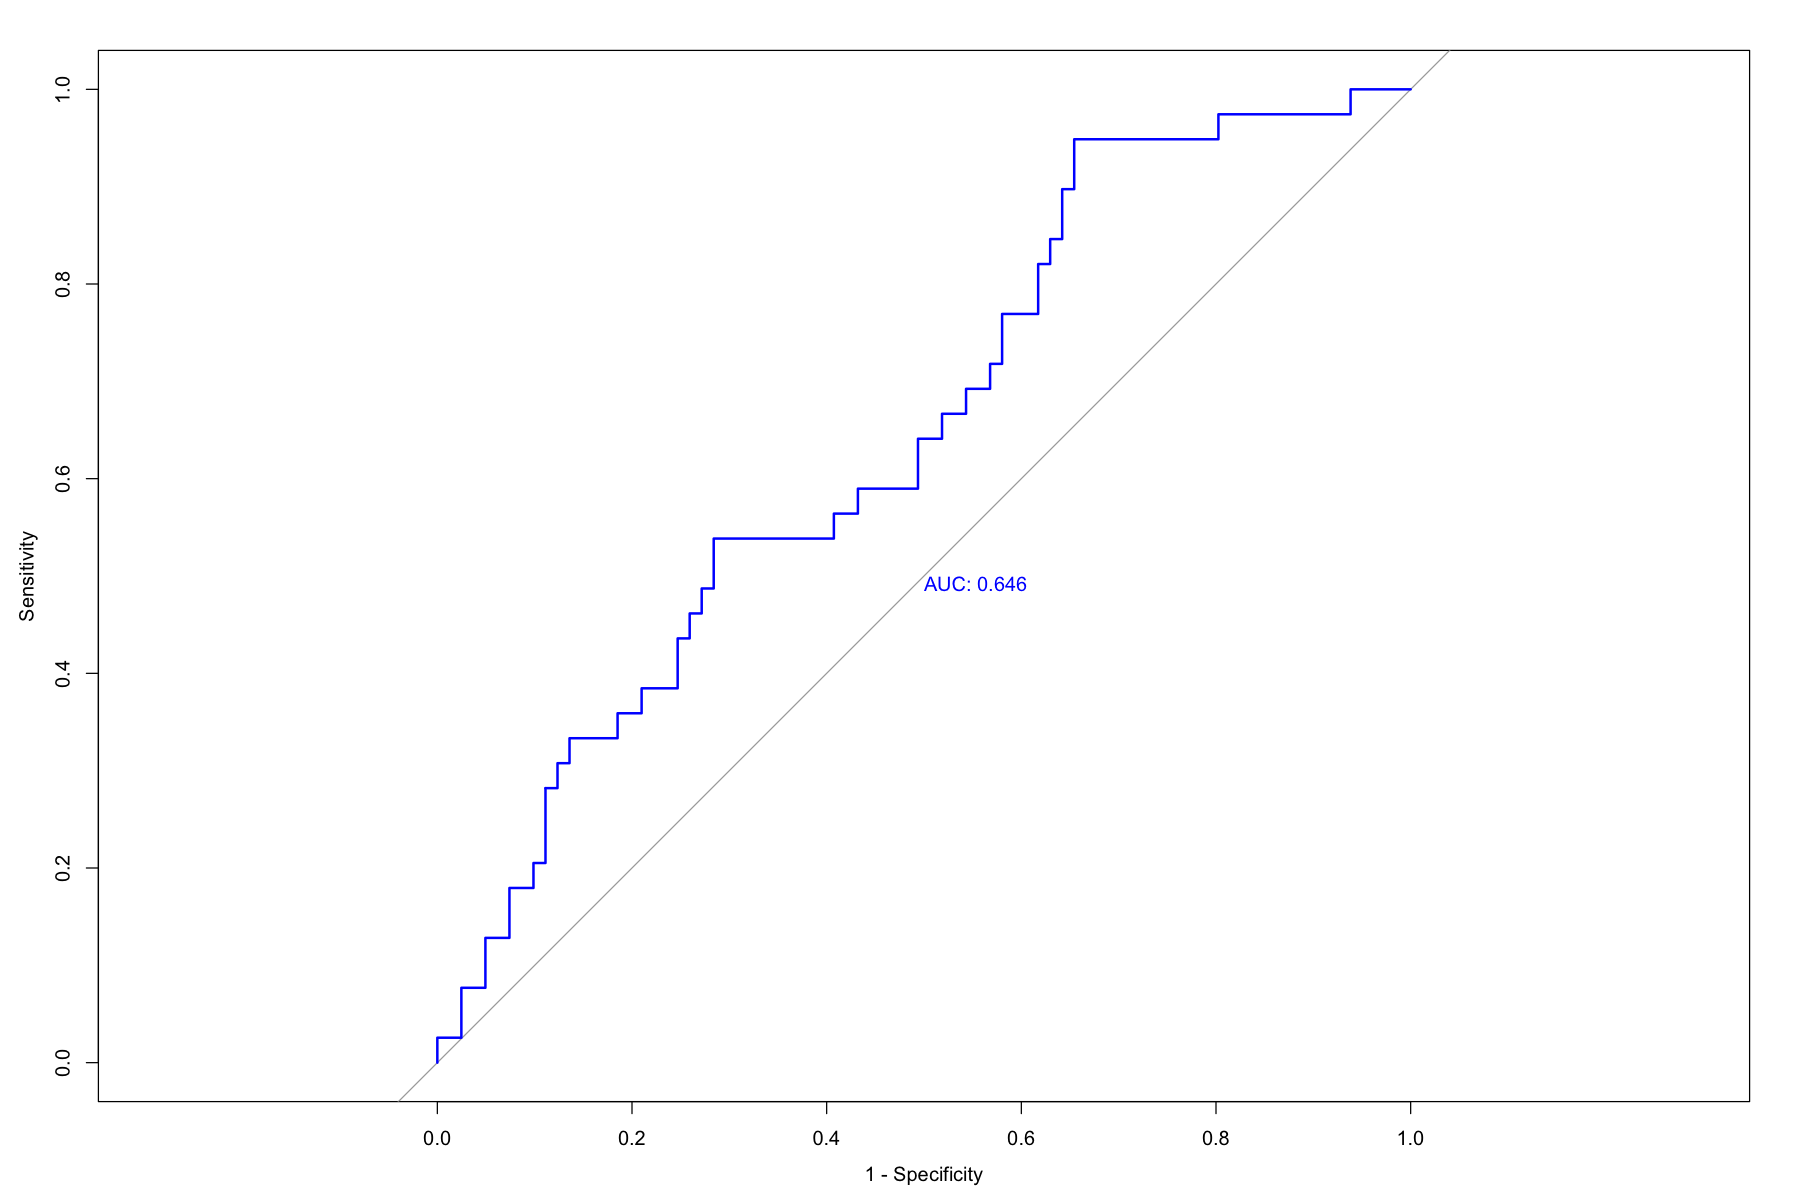

In [59]:
library(pROC)
values.roc1 <- roc(test.set$infarto, probs.test )




options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc1, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=FALSE,col="blue")


### LDA

Let's now select a training set consider 60% of data and test set with 40%. The seed is set to 222.

In [60]:
## upload the library
library(MASS)
n <- nrow(mydata)
set.seed(222)
selection <- sample(n, 0.60*n, replace=FALSE)
training.set <- mydata[selection, ]
test.set <- mydata[-selection, ]
model.mydata.lda <- lda( infarto ~ colesterolo + familiarita + tabacco + 
    carattere, data=training.set)
model.mydata.lda

Call:
lda(infarto ~ colesterolo + familiarita + tabacco + carattere, 
    data = training.set)

Prior probabilities of groups:
        0         1 
0.6055556 0.3944444 

Group means:
  colesterolo familiaritaSi tabaccoBasso carattere
0    4.581193     0.2844037    0.7247706  51.58716
1    5.707746     0.6197183    0.4084507  56.21127

Coefficients of linear discriminants:
                      LD1
colesterolo    0.13253770
familiaritaSi  1.26865941
tabaccoBasso  -1.03739661
carattere      0.03468456

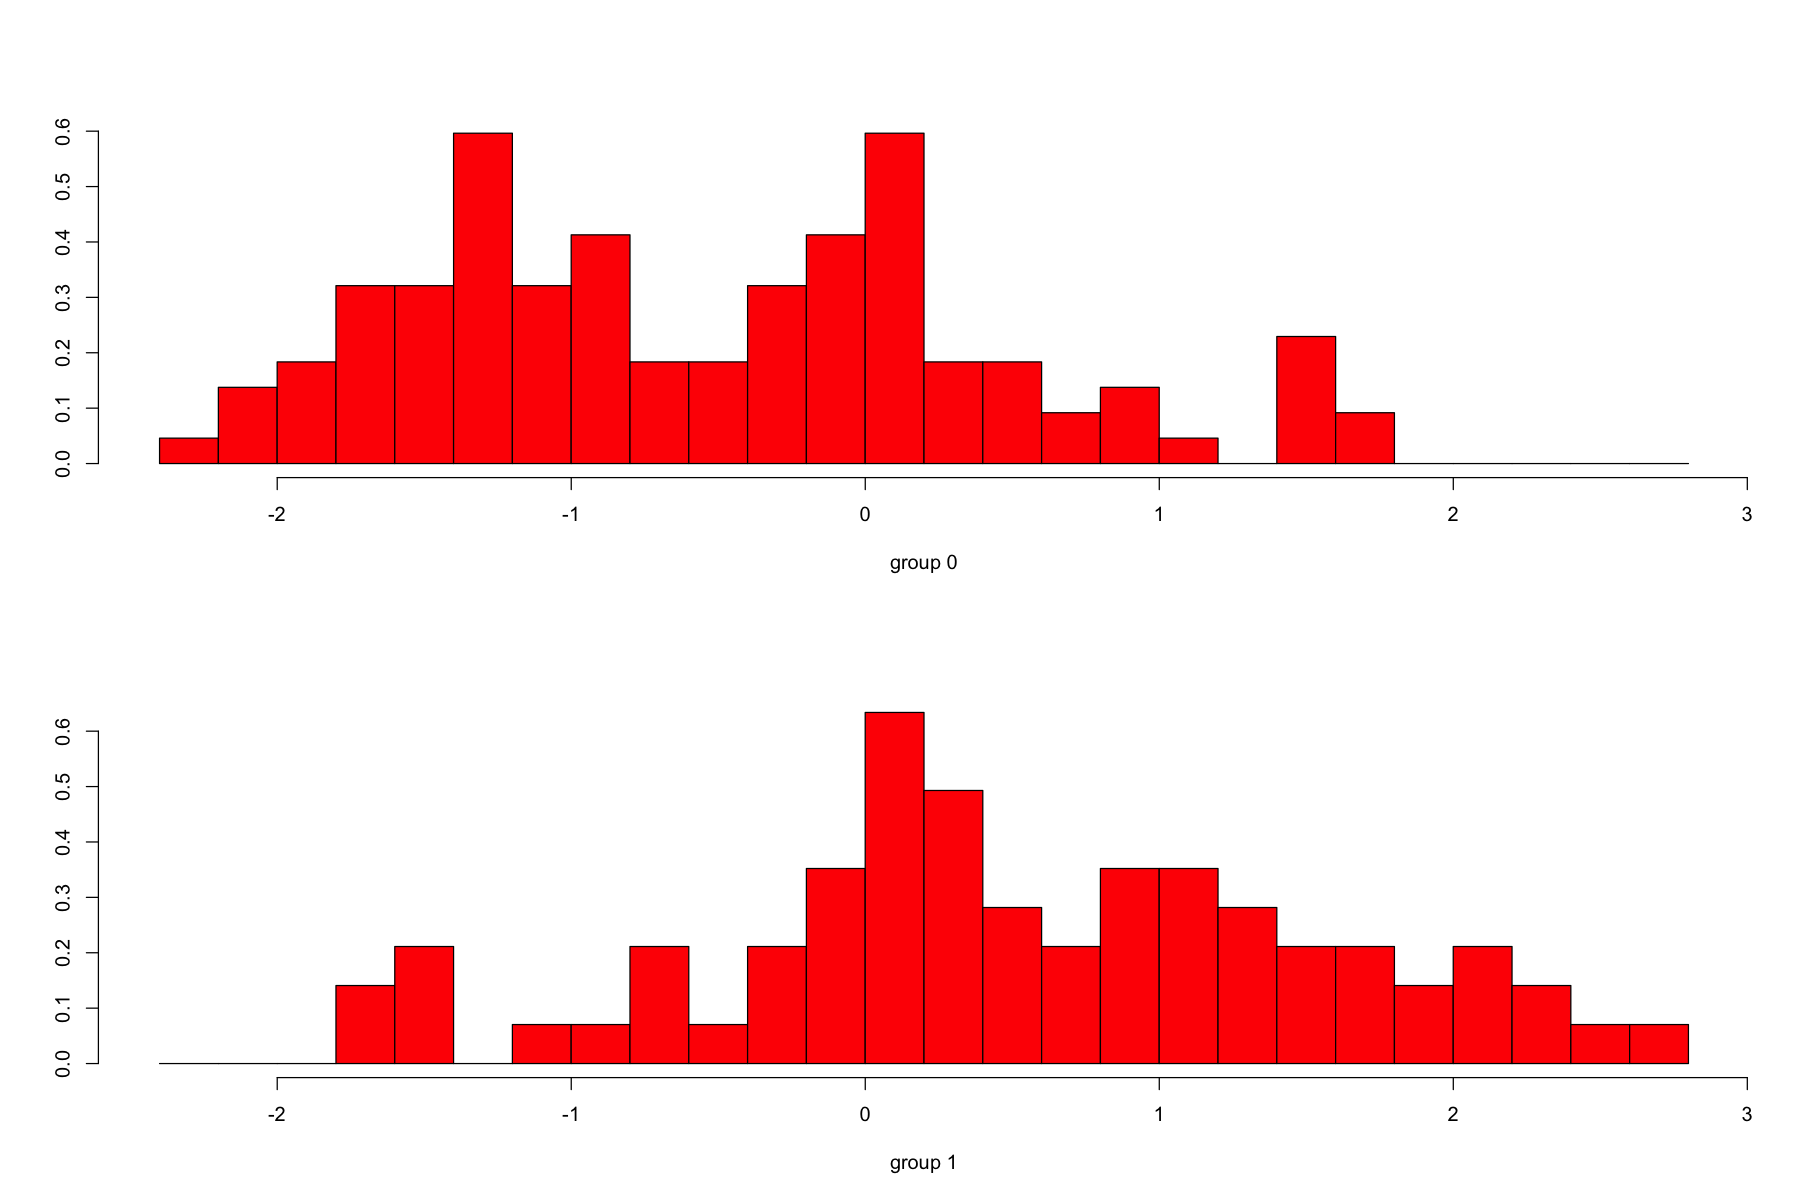

In [61]:
plot(model.mydata.lda,col="red")
par(mfrow=c(1,1))

if the discriminant function is a good function we can separate very good the two histograms otherwise not. In the case above we see a partially overleapping meaning that the discriminant function is not so good. This could also happen because the observations are few and splitting the data set into 2 samples could be
bad for the analysis.
QDA could be also worse but we will check it later on.
The confusion matrix is:

In [62]:
preds.lda <- predict(model.mydata.lda, test.set)
preds.lda1 <- rep(0, nrow(test.set))
preds.lda1[preds.lda$posterior[,2]>0.5] <- 1
addmargins(table(predictions=preds.lda1, infarto=test.set$infarto))

,0,1,Sum
0,61,23,84
1,20,16,36
Sum,81,39,120


- test error rate is: 43/120
- sensitivity is: 16/39
- specitivity is: 61781

So usign  model with lda (with MODEL obtained in the previous logistic model) and evaluate it in a training set and test set, leads to an error on the test set equal too  36%, which is a bit high but acceptable.

The below figure shows how the test data has been classified. The Predicted Group-1 and Group-2 has been colored with actual classification with black and red color. The mix of red and green color in the Group-1 and Group-2 shows the incorrect classification prediction.

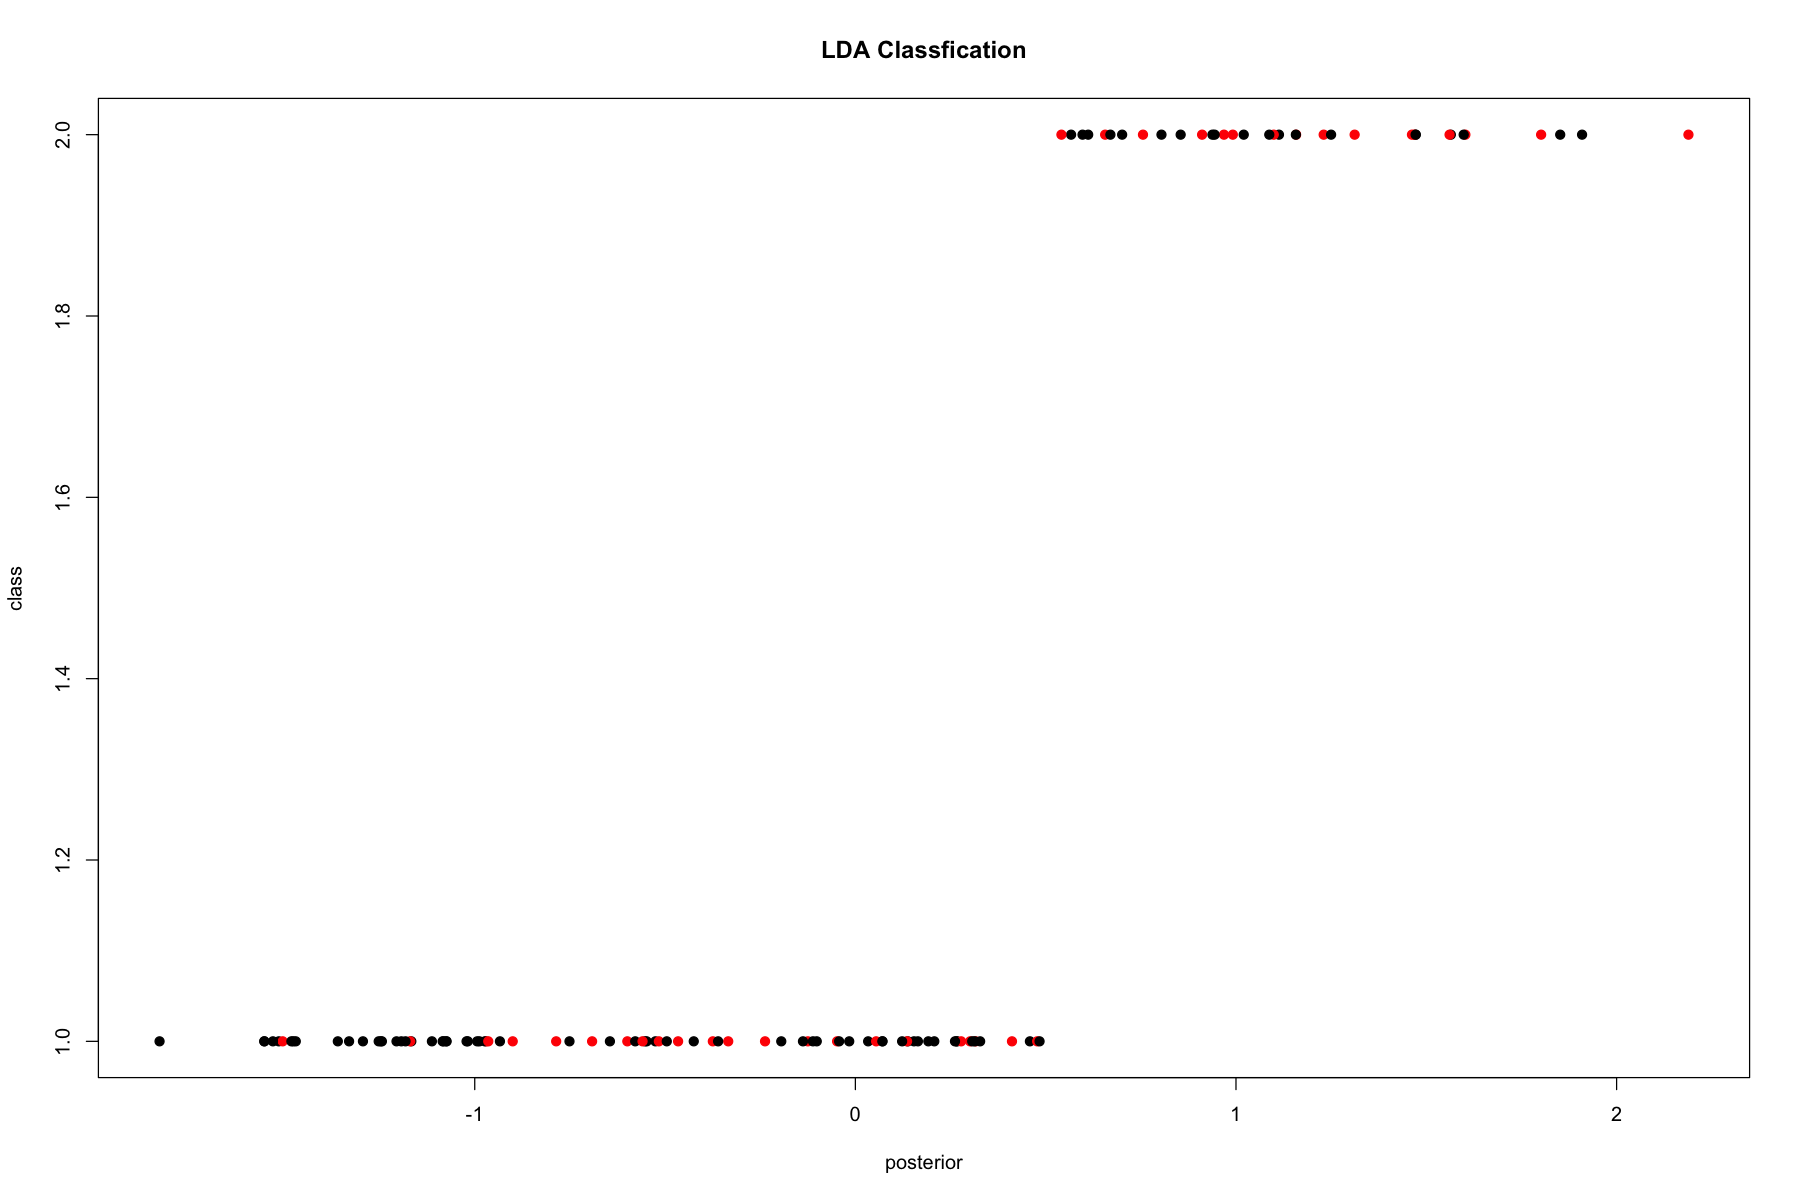

In [63]:
par(mfrow=c(1,1))
plot(preds.lda$x[,1], preds.lda$class, col=test.set$infarto,xlab="posterior",ylab="class",pch=19,main="LDA Classfication")


Let's now consider the ROC curve for in order to understand how good is our classifier. 
WE can see that the AUC value is 0.645
we know that as much closer AUC is to 1 much the model is good, so in this case is not so satisfactory we would rather have an higher value.
It is also smaller ( even if they are pretty similar) then the one obtained with Logistic Regression, so we can say that logistic regression is better in this case.


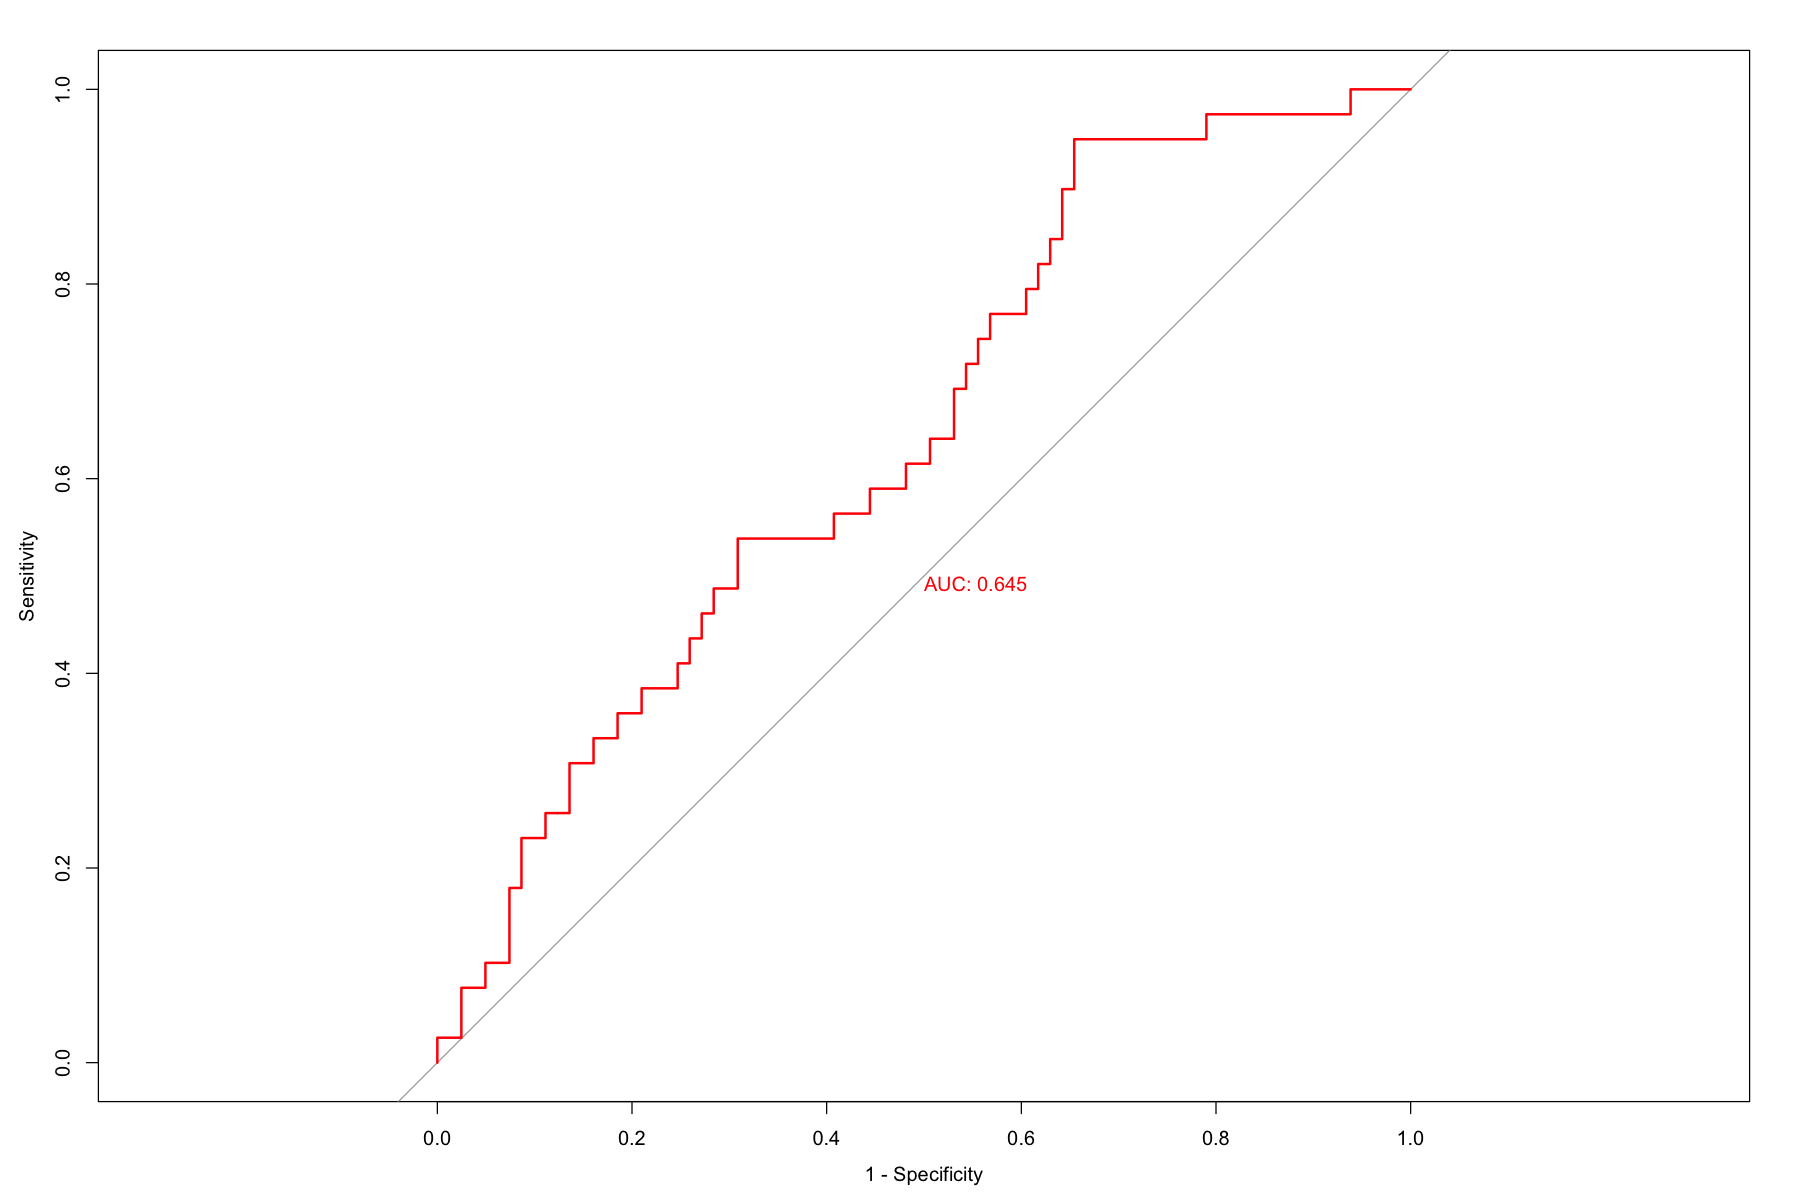

In [64]:
## ROC curve
library(pROC)

values.roc2 <- roc(test.set$infarto, preds.lda$posterior[,2] )




options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc2, legacy.axes=TRUE, xlim=c(1.0, 0.0),print.auc=TRUE, auc.polygon=FALSE,col="red")
#plot(values.roc, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon.col=TRUE)

# COMMENTARE

### QDA

Let's perform QDA

In [65]:
model.mydata.qda <- qda(infarto ~ colesterolo + familiarita + tabacco + carattere, data=training.set)
model.mydata.qda


Call:
qda(infarto ~ colesterolo + familiarita + tabacco + carattere, 
    data = training.set)

Prior probabilities of groups:
        0         1 
0.6055556 0.3944444 

Group means:
  colesterolo familiaritaSi tabaccoBasso carattere
0    4.581193     0.2844037    0.7247706  51.58716
1    5.707746     0.6197183    0.4084507  56.21127

The confusion matrix is:

In [66]:
# prediction and missclassification table
preds.qda <- predict(model.mydata.qda, test.set)
#preds.qda


preds.qda1 <- rep(0, nrow(test.set))
preds.qda1[preds.qda$posterior[,2]>0.5] <- 1
addmargins(table(predictions=preds.qda1, infarto=test.set$infarto))

,0,1,Sum
0,53,18,71
1,28,21,49
Sum,81,39,120


- test error rate is: 46/120
- sensitivity is: 21/39
- specitivity is:53781



The below figure shows how the test data has been classified. The Predicted Group-1 and Group-2 has been colored with actual classification with black and red color. The mix of red and green color in the Group-1 and Group-2 shows the incorrect classification prediction.


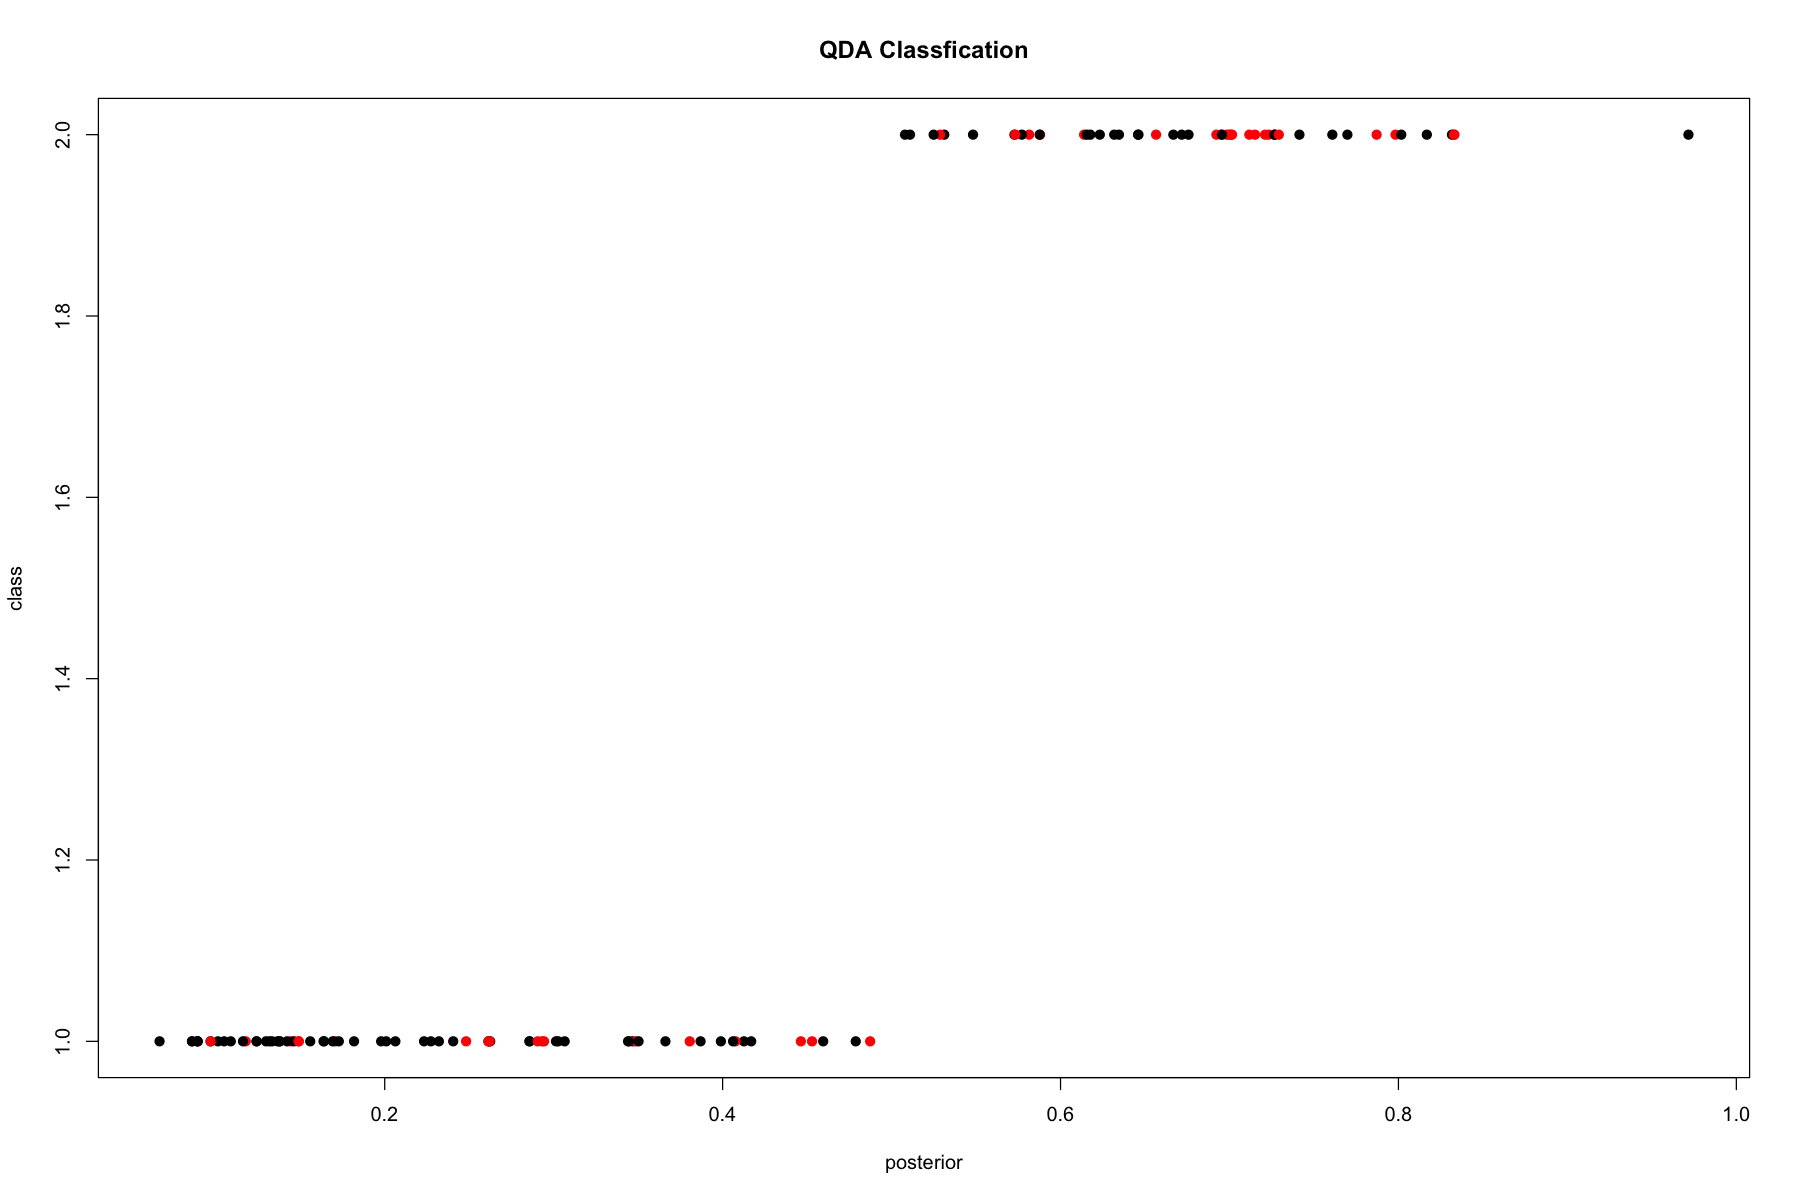

In [67]:
par(mfrow=c(1,1))
plot(preds.qda$posterior[,2], preds.qda$class,xlab="posterior",ylab="class", col=test.set$infarto,pch=19,main="QDA Classfication")

Let's now consider the ROC curve for in order to understand how good is our classifier. 
We can see that the AUC value is 0.661

we know that as much closer AUC is to 1 much the model is good, so in this case is not so satisfactory , we would rather have an higher value.
It is also higher  then the one obtained with Logistic Regression and  to one obained with LDA, so we would say that QDA is better in this case. By the way they are not so different so we might chose logistic rgeression since it is less complex.

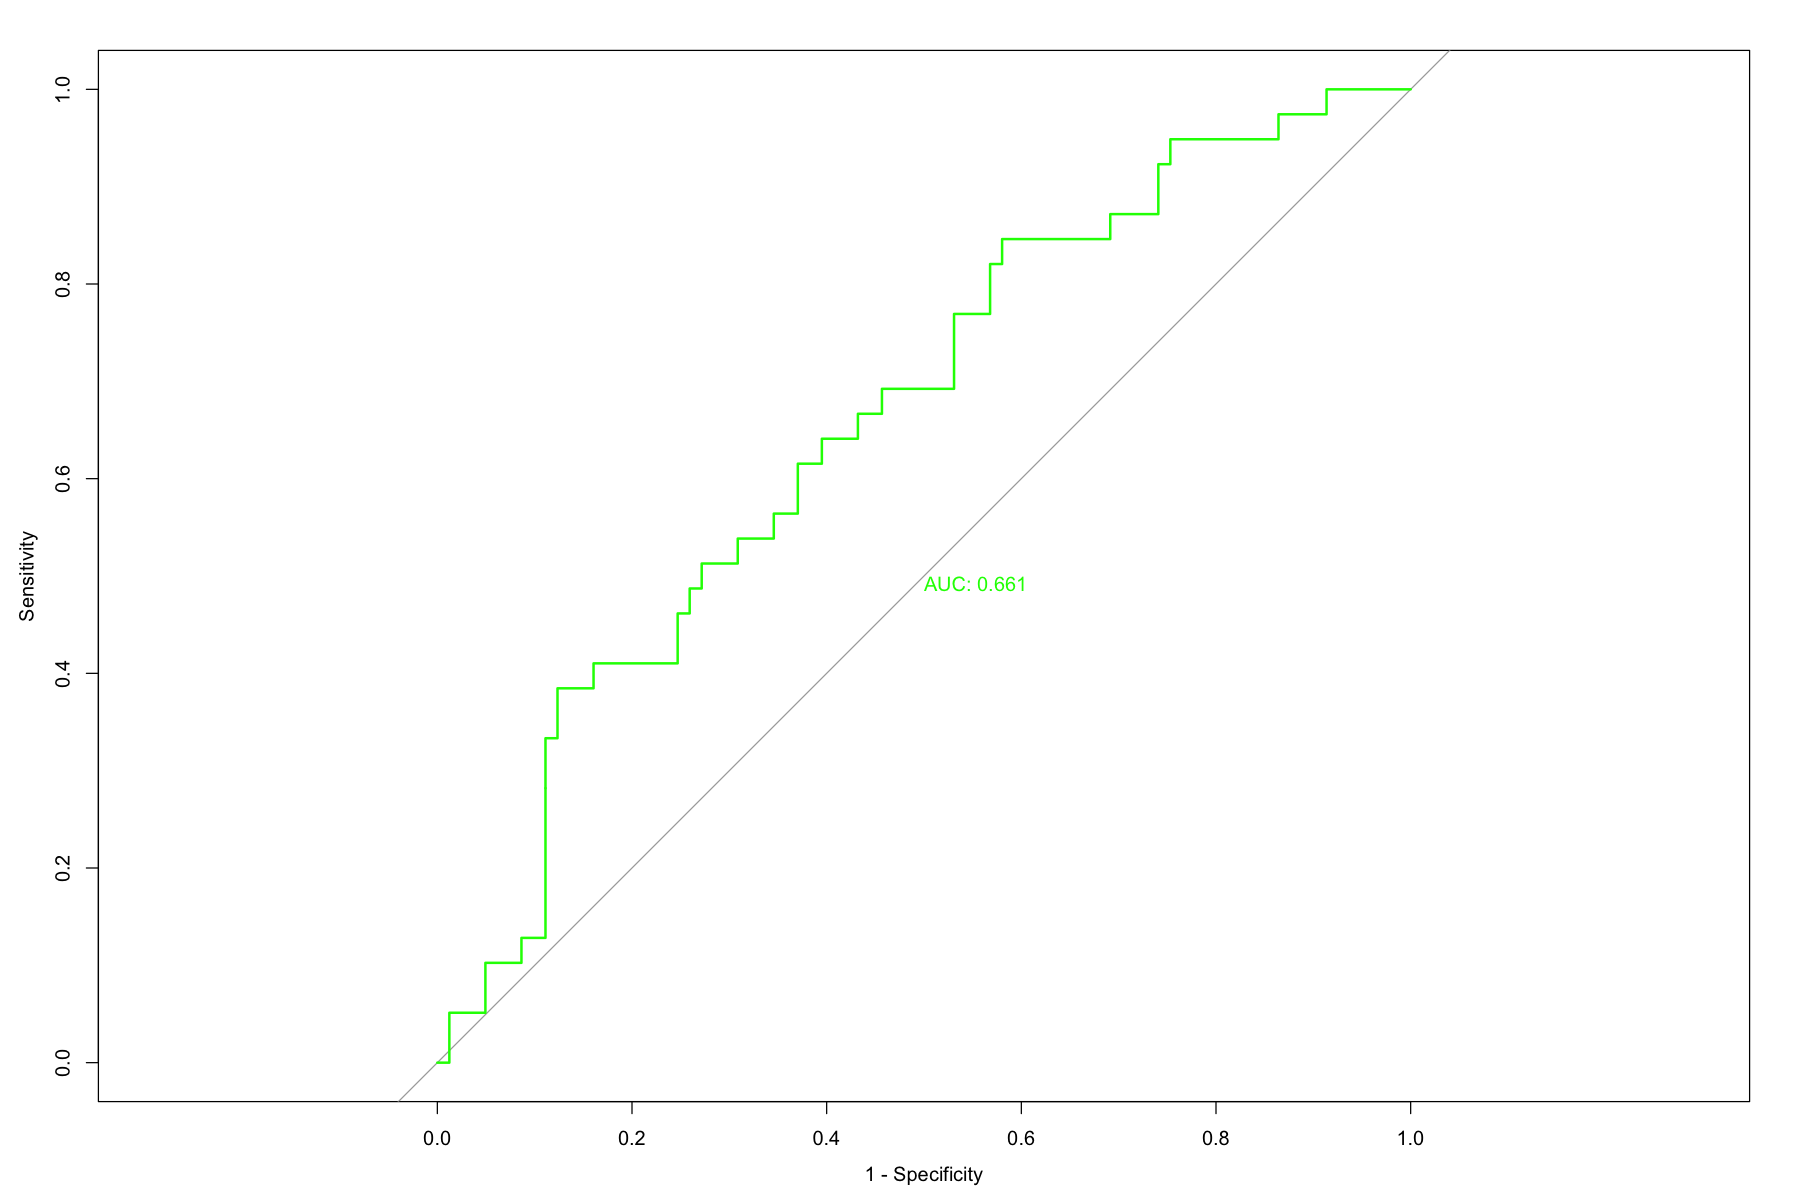

In [68]:
values.roc3 <- roc(test.set$infarto, preds.qda$posterior[,2] )
options(repr.plot.width = 15, repr.plot.height = 10)
plot(values.roc3, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=FALSE, col="green")


### CONCLUSION POINT 1

Based on ROC curve (plot below) we see that the best classifier is the one obtained with the QDA  (Highest AUC) but since they are so difference we keep logistic regression as model to describe subset of data.
So we see that:
- familiarity affects positively the odds of heart-stroke.
- caracter affects positively the odds of of heart-stroke.


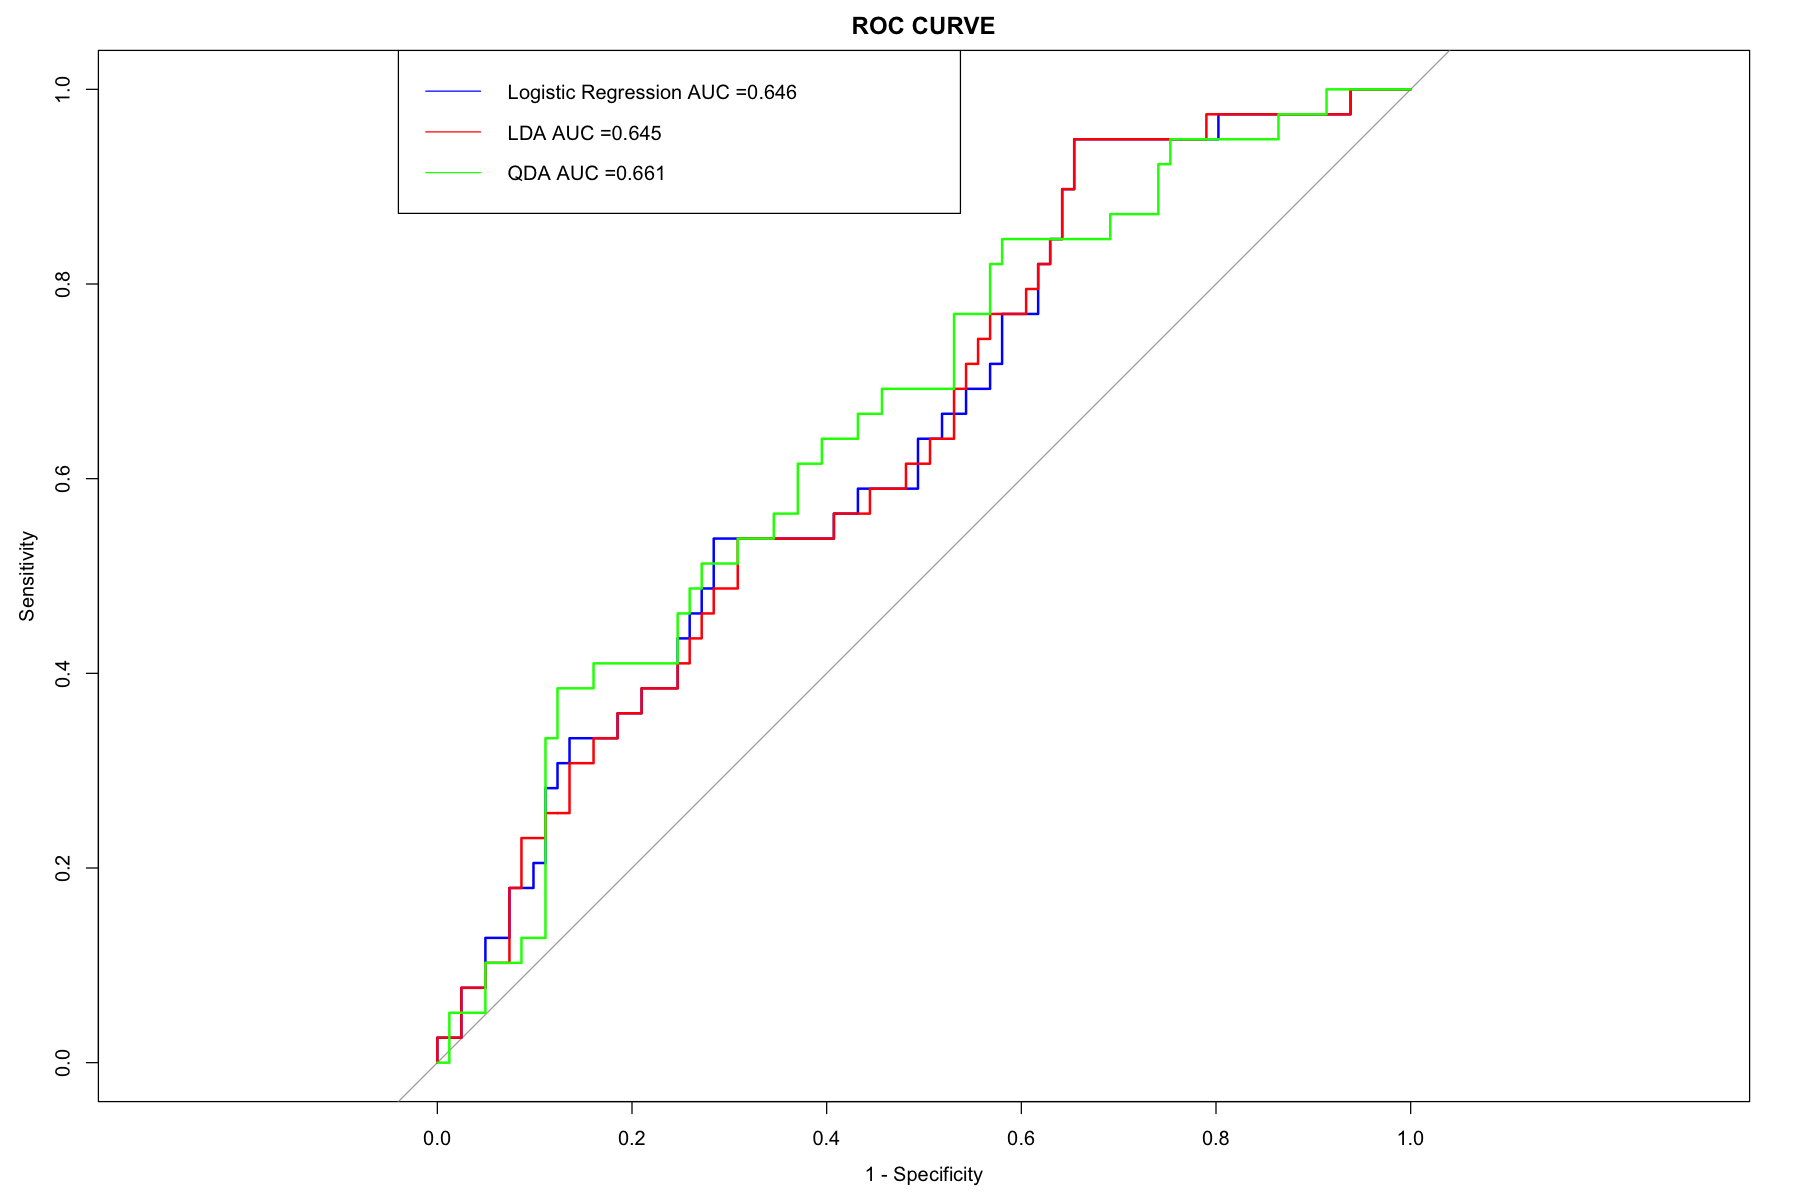

In [69]:
plot(values.roc1, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=FALSE, auc.polygon=FALSE,col="blue",main="ROC CURVE")
lines(values.roc2, legacy.axes=TRUE, xlim=c(1.0, 0.0),print.auc=FALSE, auc.polygon=FALSE,col="red",add=TRUE)
lines(values.roc3, legacy.axes=TRUE, xlim=c(1.0, 0.0),lty=1,print.auc=FALSE, auc.polygon=FALSE,col="green",add=TRUE)
legend("topleft",legend=c(paste0("Logistic Regression AUC =",round(auc(values.roc1),3)),paste0("LDA AUC =",round(auc(values.roc2),3)),paste0("QDA AUC =",round(auc(values.roc3),3))),lty=c(1,1,1),col=c("blue","red","green"))



# POINT 2
Let's consider all the variables now.

### RIDGE
Let's try with Ridge regression with all variables 
The complete dataset is (first 3 rows):

In [70]:
 mydata<-cuore
summary(mydata)
dim(mydata)


# verifica correttezza subset:
mydata[1:3,]

#verifica dimensione subset:
dim(mydata)

## AGGIUNGERE VARIABILE
#taking <- rep(1, length(mydata$budget))

## substitute 0 to the ones corresponding to cars with mpg lower than the med
#taking [mydata$box<20000000]=0
## create the dataset we need


#if you want to add a new variable into a mydata
#mydata<-data.frame(taking=taking ,mydata[,c("budget", "action", "cmngsoon")])
#mydata[1:3,]

mydata$familiarita<-as.factor(mydata$familiarita)
mydata$tabacco<-as.factor(mydata$tabacco)
mydata$infarto<-as.factor(mydata$infarto)

   pressione      colesterolo       adiposita     familiarita   carattere    
 Min.   :101.0   Min.   : 0.980   Min.   : 9.37   No:183      Min.   :13.00  
 1st Qu.:122.0   1st Qu.: 3.368   1st Qu.:18.96   Si:117      1st Qu.:48.00  
 Median :133.0   Median : 4.440   Median :25.79               Median :54.00  
 Mean   :135.8   Mean   : 4.829   Mean   :24.98               Mean   :54.23  
 3rd Qu.:144.0   3rd Qu.: 5.928   3rd Qu.:30.87               3rd Qu.:61.00  
 Max.   :208.0   Max.   :15.330   Max.   :42.49               Max.   :78.00  
      bmi           alcolici             anni          infarto      
 Min.   :17.75   Min.   :  0.0000   Min.   :15.00   Min.   :0.0000  
 1st Qu.:22.76   1st Qu.:  0.1425   1st Qu.:30.00   1st Qu.:0.0000  
 Median :25.69   Median :  5.7050   Median :44.00   Median :0.0000  
 Mean   :26.01   Mean   : 14.7379   Mean   :42.22   Mean   :0.3667  
 3rd Qu.:28.38   3rd Qu.: 19.5175   3rd Qu.:55.00   3rd Qu.:1.0000  
 Max.   :46.58   Max.   :147.1900   Max.

[1] 300  10

pressione,colesterolo,adiposita,familiarita,carattere,bmi,alcolici,anni,infarto,tabacco
160,5.73,23.11,Si,49,25.30,97.20,52,1,Alto
144,4.41,28.61,No,55,28.87,2.06,63,1,Basso
118,3.48,32.28,Si,52,29.14,3.81,46,0,Basso


[1] 300  10

Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that  9  over the graph indicate the number of covariates entering the model as  $ \lambda$ varies: 9 is repeated, as ridge regression is not a selection method.

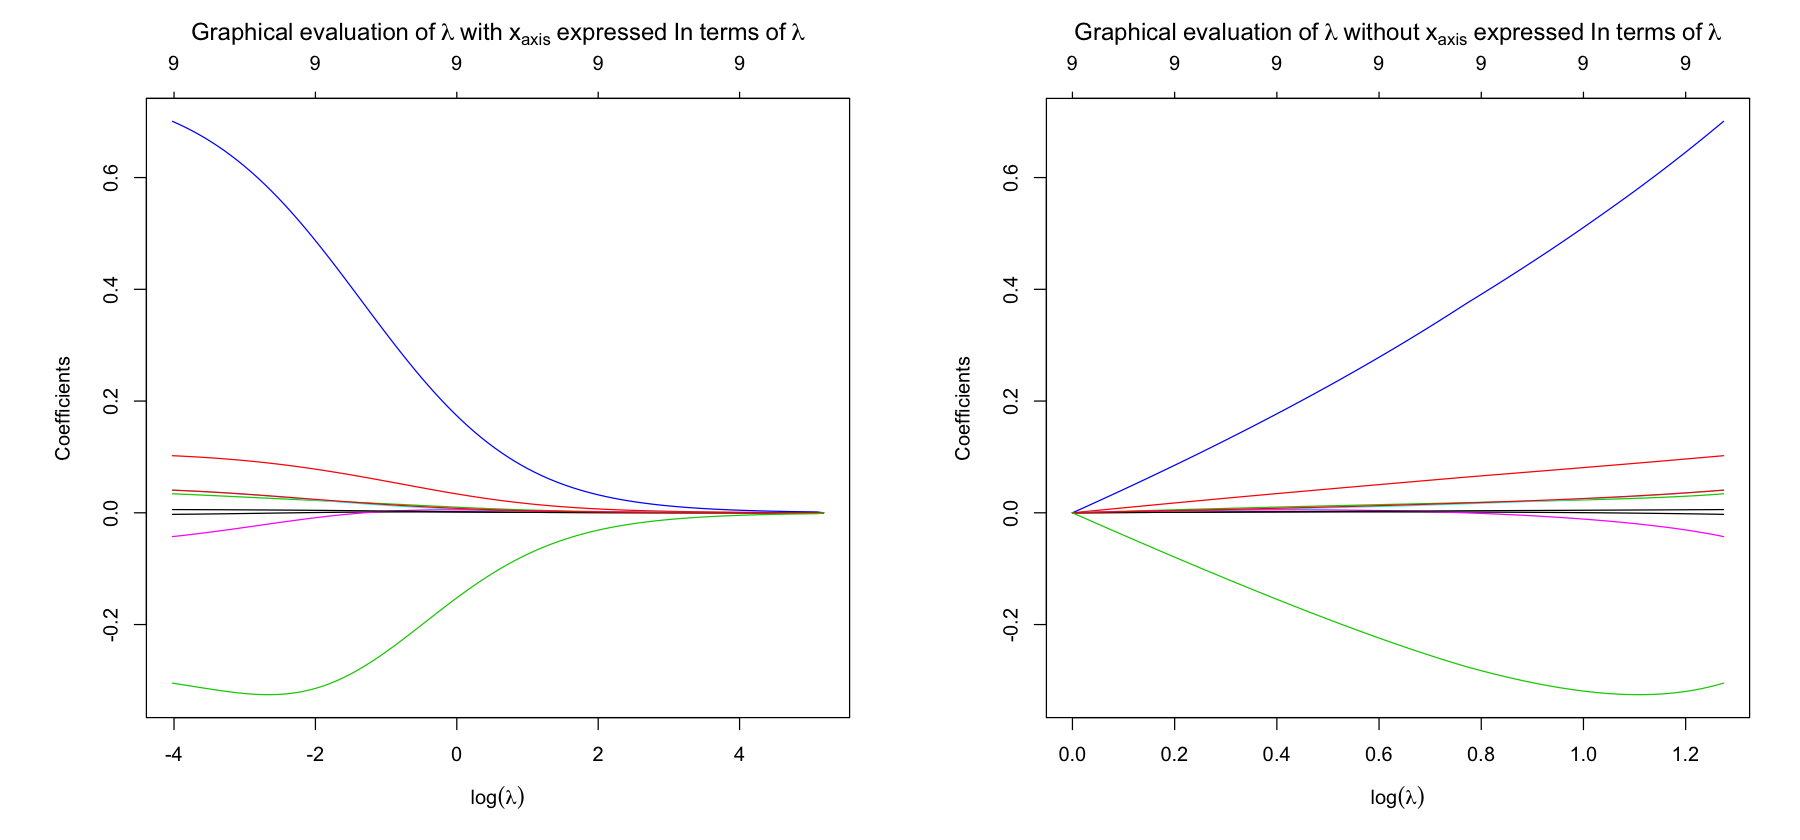

In [75]:
library(glmnet)
y <-  mydata$infarto
X <- model.matrix(infarto ~ . , data=mydata)[,-1]
m.ridge <- glmnet(X, y, alpha=0,family='binomial')

## plot graphical evaluation

options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.ridge, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
The plot below shows the values of $cvm$ for each $log(\lambda)$ together with the associated confidence interval. The two dashed lines are the values of minimun $log(\lambda)$  and $log(\lambda)$ $1 \sigma$ far from the minimum. \
So the best $\lambda$  from cross validation is: 0.07 \
And the MSE is:0.1.15

[1] 0.07229583

[1] 1.145078

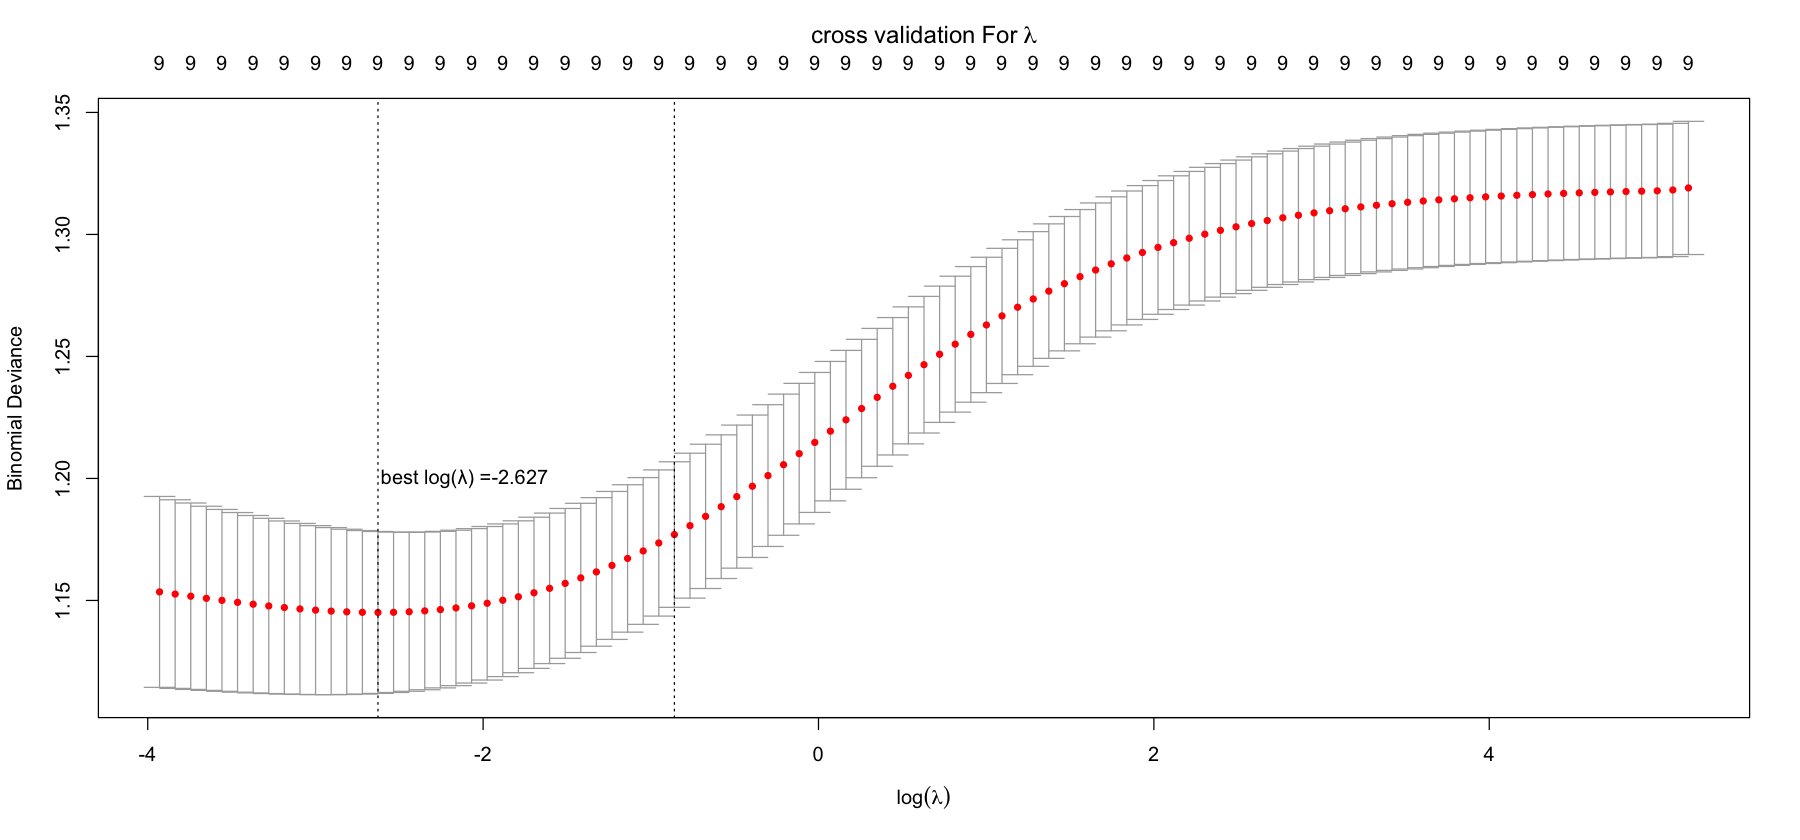

In [77]:
### cross validation plot

set.seed(2906)
options(warn=-1)
cv.ridge <- cv.glmnet(X, y, alpha=0,family='binomial')
plot(cv.ridge, xlab=expression(log(lambda)))
text(x=log(cv.ridge$lambda.min)+0.5, y=1.2, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.ridge$lambda.min
best.lambda

mse<-min(cv.ridge$cvm)
mse

Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to:0.18


Call:  glmnet(x = X, y = y, family = "binomial", alpha = 0, lambda = best.lambda) 

     Df  %Dev Lambda
[1,]  9 0.172 0.0723

10 x 1 sparse Matrix of class "dgCMatrix"
                         s0
(Intercept)   -4.1383262560
pressione     -0.0005986543
colesterolo    0.0885691902
adiposita      0.0258637556
familiaritaSi  0.5766102027
carattere      0.0295444072
bmi           -0.0194402981
alcolici       0.0050178618
anni           0.0301517030
tabaccoBasso  -0.3254896914

[1] 0.1824197

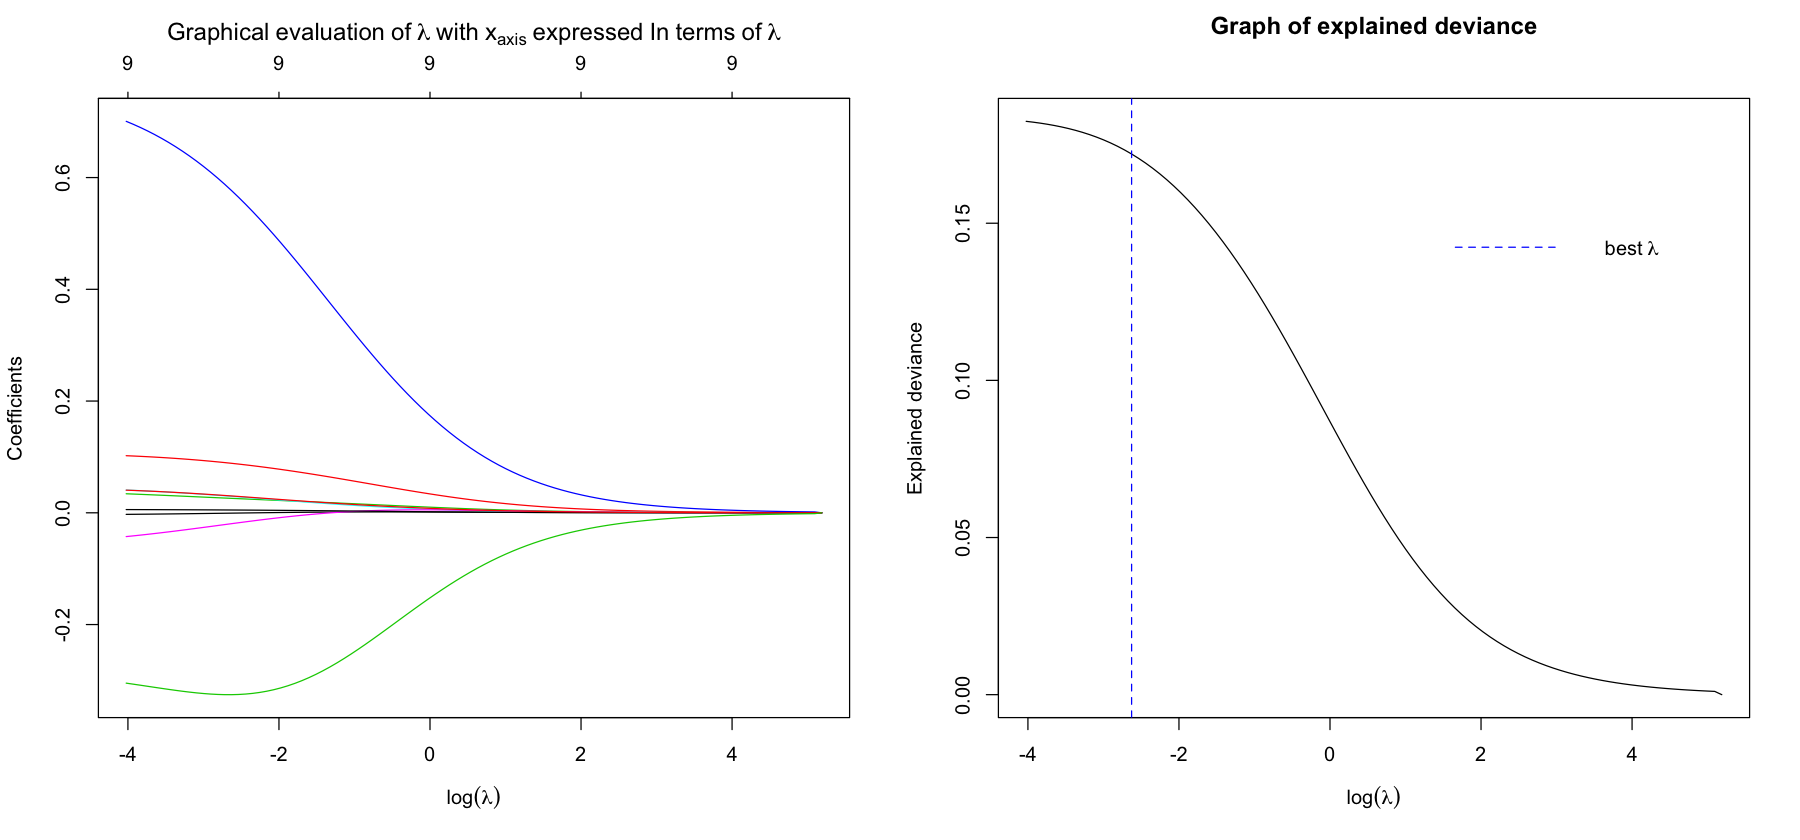

In [79]:
#### best model

m.ridge.min <- glmnet(X, y, alpha=0, lambda=best.lambda,family='binomial')
m.ridge.min
coef(m.ridge.min)

par(mfrow=c(1,2))
plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
       xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 1,bty="n", y=0.15)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.ridge$dev.ratio)

### LASSO
Let's perform the analysis usign lasso.
Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that 9 over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:9 is not repeated, as lasso regression is a selection method.

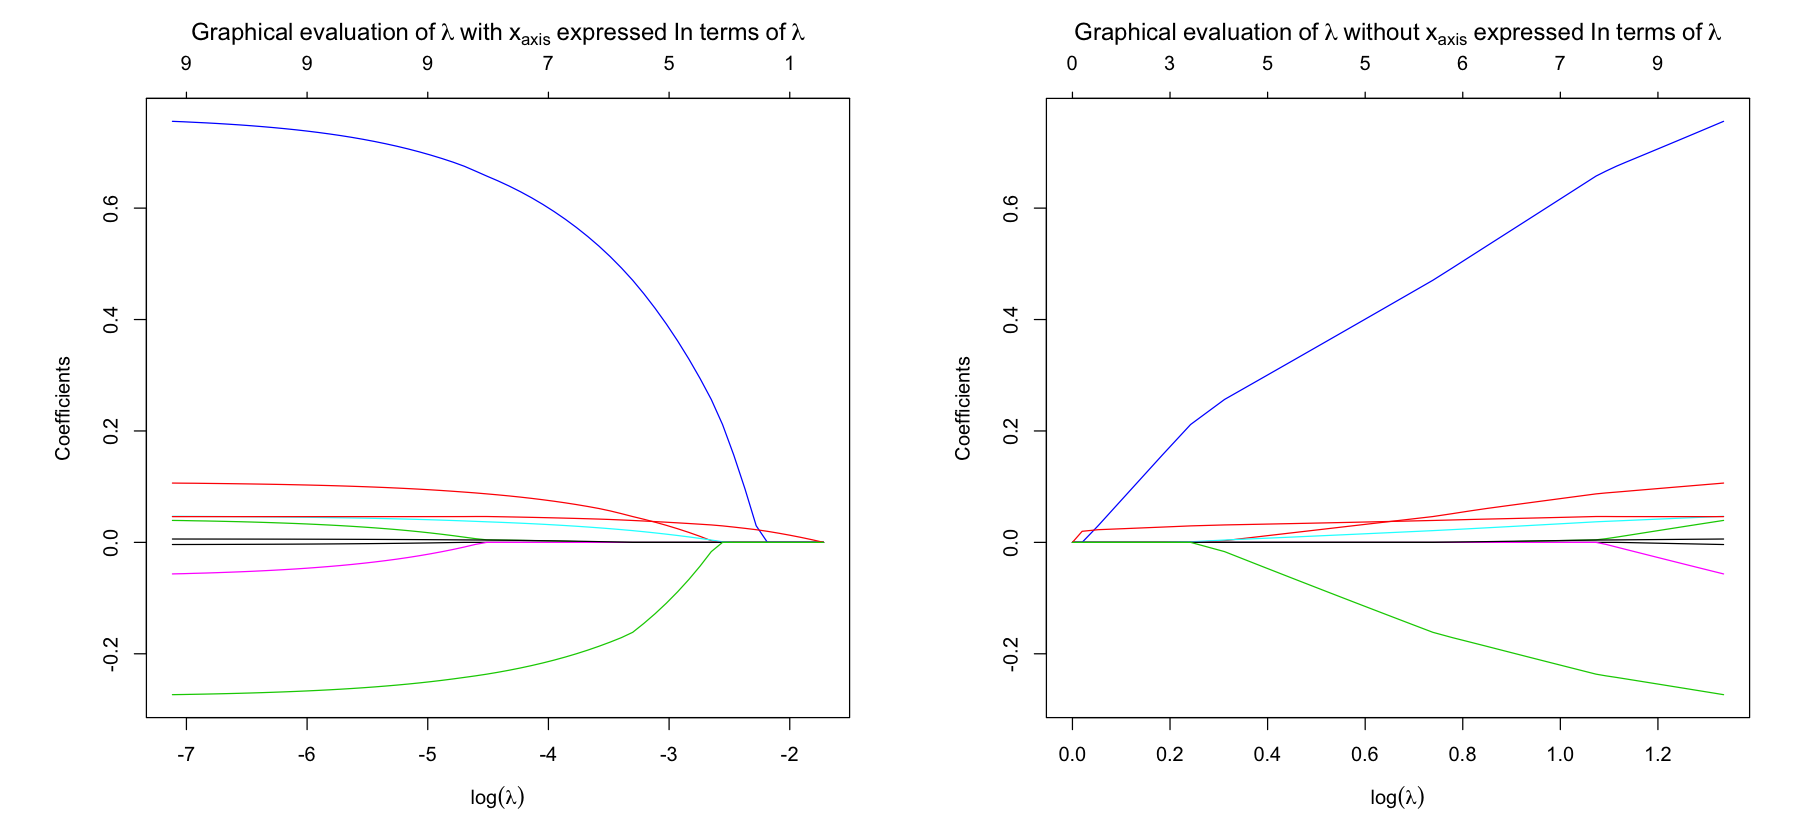

In [80]:
m.lasso <- glmnet(X, y, alpha=1,family="binomial")
options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.lasso, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
So the best $\lambda$  from cross validation is: 0.02\
And the MSE is:1.15

[1] 0.01749652

[1] 1.145826

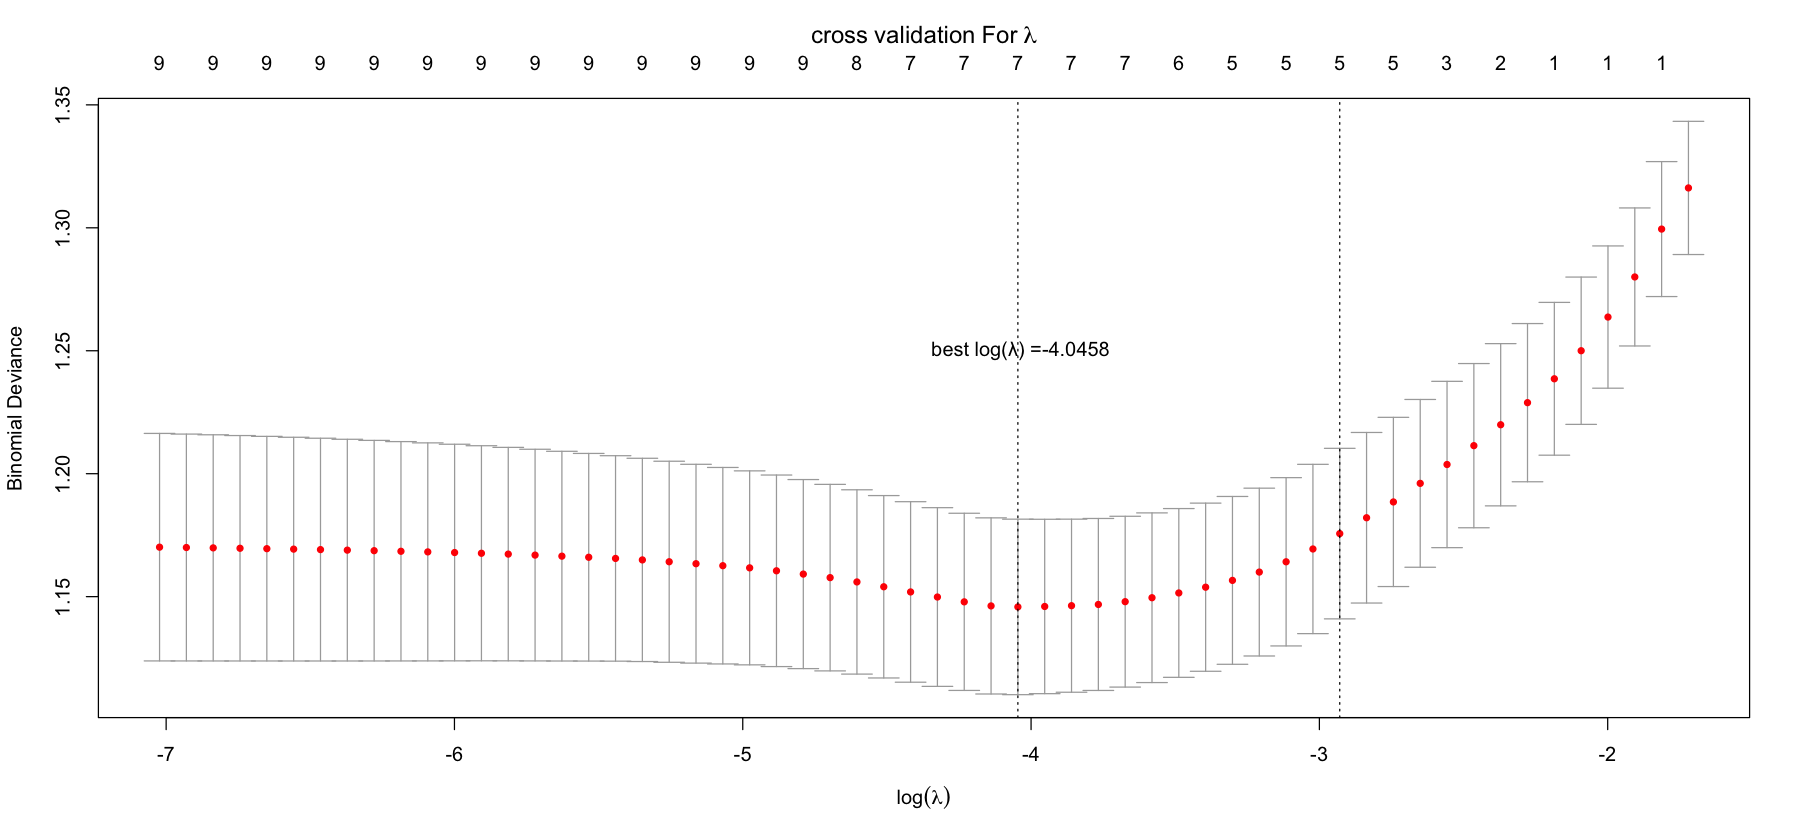

In [82]:
set.seed(2906)
options(warn=-1)
cv.lasso <- cv.glmnet(X, y, alpha=1,family="binomial")
plot(cv.lasso, xlab=expression(log(lambda)))
text(x=log(cv.lasso$lambda.min), y=1.25, paste0(" best log(λ) =",round((log(cv.lasso$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.lasso$lambda.min
best.lambda

mse<-min(cv.lasso$cvm)
mse

On the basis of MSE (they are equal) , the model fitted with lasso is preferable. In addition, the resulting model with lasso is simplest.
Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model (8), graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: 0.184\
Furthermore from the new coefficients we can see that the coefficients that are removed from the model due to lasso selection are: pression and bmi.  


Call:  glmnet(x = X, y = y, family = "binomial", alpha = 1, lambda = best.lambda) 

     Df   %Dev Lambda
[1,]  7 0.1735 0.0175

10 x 1 sparse Matrix of class "dgCMatrix"
                        s0
(Intercept)   -4.918395226
pressione      .          
colesterolo    0.076511254
adiposita      0.002837612
familiaritaSi  0.606596948
carattere      0.032491111
bmi            .          
alcolici       0.003039235
anni           0.044467019
tabaccoBasso  -0.216419434

[1] 8

[1] 0.1840194

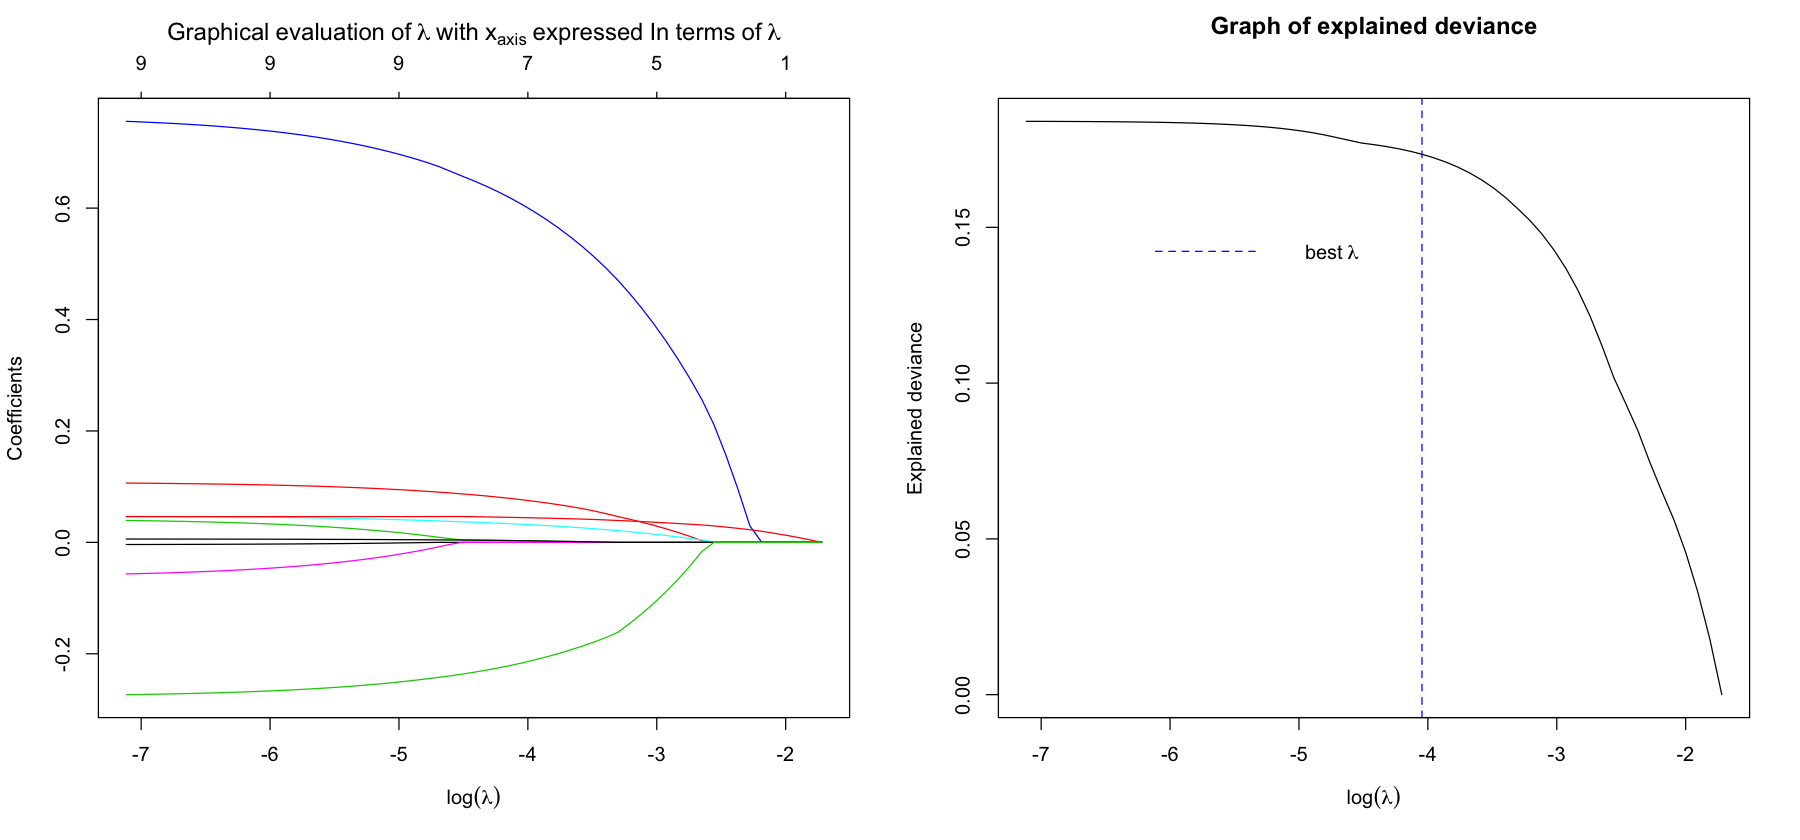

In [86]:

m.lasso.min <- glmnet(X, y, alpha=1, lambda=best.lambda,family="binomial")
m.lasso.min
coef(m.lasso.min)

## number of coefficient diversi da 0

id.zero <- which(coef(m.lasso.min)==0)
nonzero <- length(coef(m.lasso.min))-length(id.zero)
nonzero



par(mfrow=c(1,2))
plot(m.lasso, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.lasso$lambda), m.lasso$dev.ratio, type='l',
        xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x =-6.5,bty="n", y=0.15)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.lasso$dev.ratio)

### PRINCIPAL COMPONENT ANALYSIS
Let's consider Principal component analysis in order to see if it is useful.
I set the seed at 222.

In [157]:
library(pls)
set.seed(222)
mydata$infarto<-as.numeric( mydata$infarto)
#y <-  mydata$taking
#X <- model.matrix(taking ~ .  , data=mydata)[,-1]
m.pcr <- pcr(infarto ~ .  , ncomp=10, scale=TRUE, validation='CV', data=mydata)
summary(m.pcr)

Data: 	X dimension: 300 10 
	Y dimension: 300 1
Fit method: svdpc
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV          0.4835   0.4167   0.3857   0.3455   0.3396   0.2989   0.2593
adjCV       0.4835   0.4165   0.3846   0.3445   0.3396   0.2806   0.2624
       7 comps  8 comps    9 comps   10 comps
CV      0.1593   0.1123  0.0024180  9.505e-16
adjCV   0.1435   0.1107  0.0001846  6.317e-16

TRAINING: % variance explained
         1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X          32.10    44.98    55.73    65.47    73.21    80.69    87.56    93.80
infarto    26.12    38.64    52.39    53.53    72.75    74.64    93.05    95.23
         9 comps  10 comps
X          98.32       100
infarto   100.00       100


The output provides the result of the cross validation in terms of square root of the MSE for each number of PCs
We see that the  number of PCs needed is:  10
While the best number of components we can use for the analysis, based on R selection is :9
We also have that the value of MSE is reported below.


In [99]:
MSEP(m.pcr, ncomp=selectNcomp(m.pcr, method='onesigma', ncomp=10))

       (Intercept)    9 comps
CV          0.2338  5.847e-06
adjCV       0.2338  3.408e-08

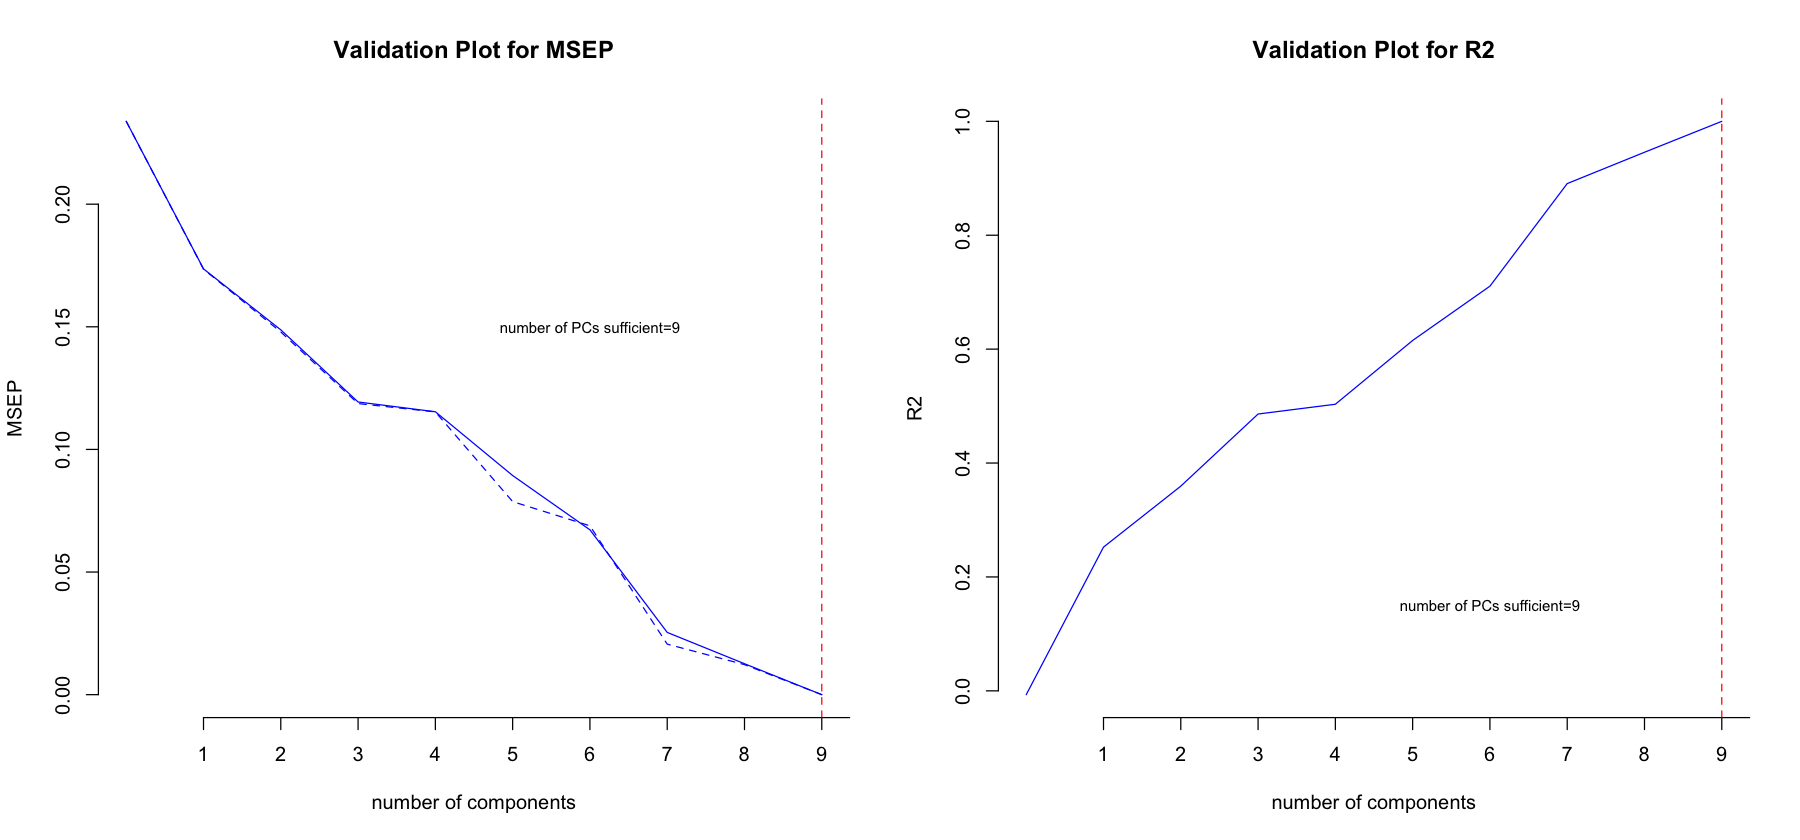

In [100]:
par(mfrow=c(1,2))
## graph without axes

validationplot(m.pcr, val.type='MSEP', main='Validation Plot for MSEP', axes=FALSE, col="blue")
## add on the x-axis (1) with the specification (at) of the points at which tick-mar ## are to be drawn
axis(1, at=1:10)
## add on the y-axis
axis(2)
text(x=6, y=0.15,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=10)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=10), col="red",lt=2)

validationplot(m.pcr, val.type='R2', main='Validation Plot for R2', axes=FALSE,col="blue")
axis(1, at=1:10)
axis(2)
text(x=6, y=0.15,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=10)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=10), col="red",lt=2)

Let's look how much variance is explained by the 9 components (100%).


Comp 1    Comp 2    Comp 3    Comp 4    Comp 5    Comp 6    Comp 7    Comp 8 
32.098212 12.881075 10.748370  9.743642  7.739362  7.474366  6.877279  6.242364 
   Comp 9 
 4.519972

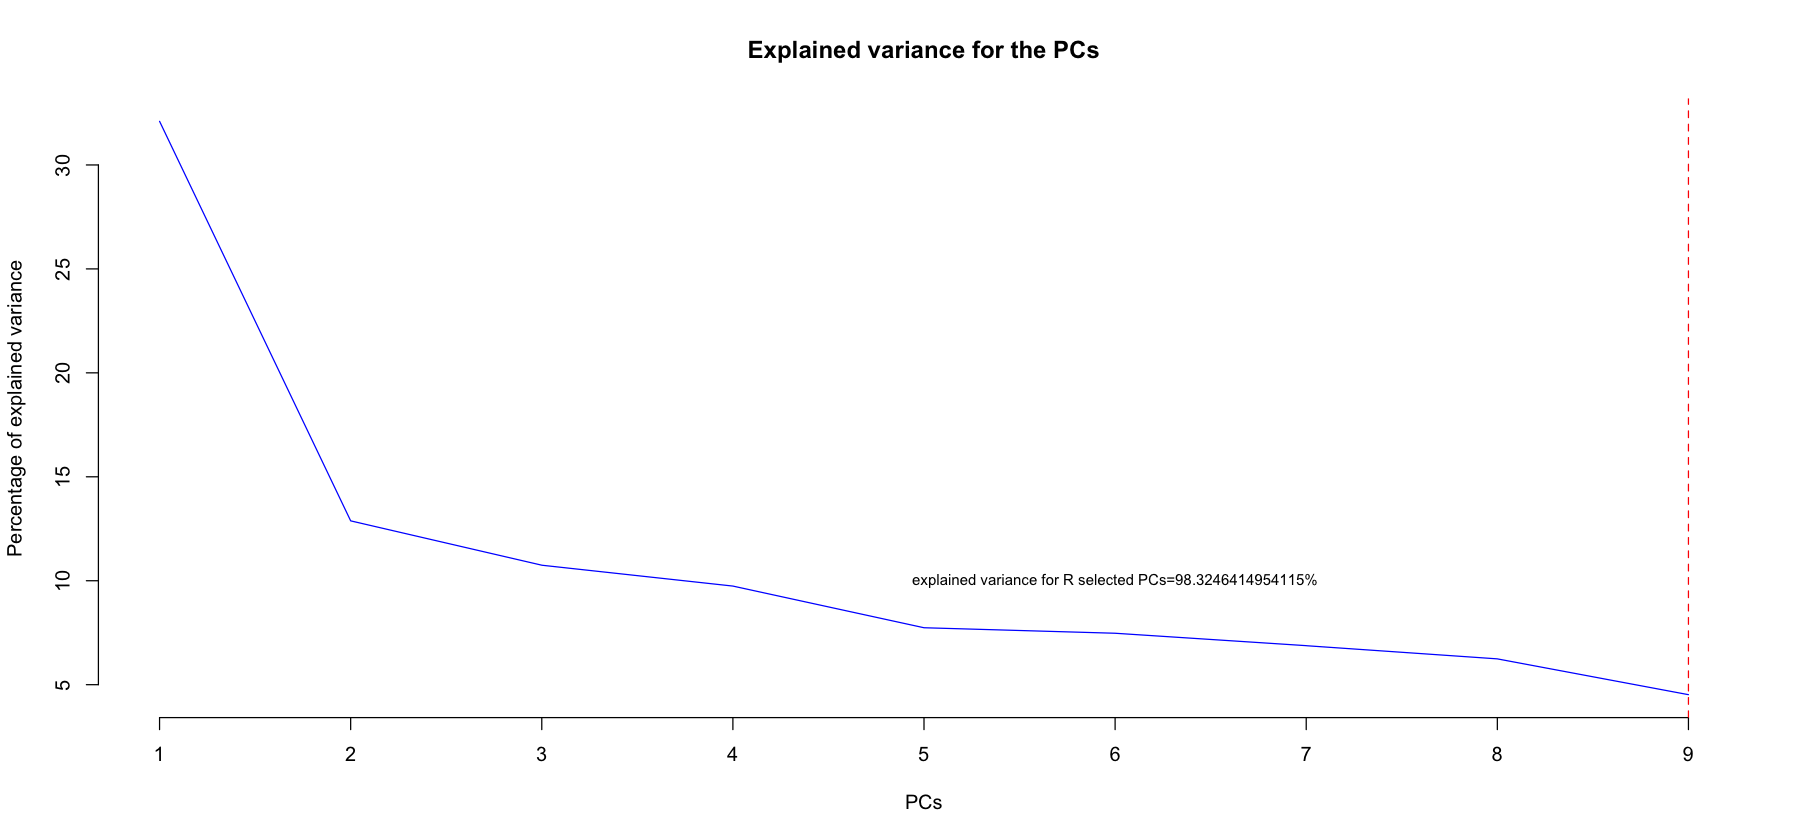

In [129]:
## explained variance
explvar(m.pcr)
sum=sum(explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=10)])

## plot:

plot(1:9, explvar(m.pcr), ylab='Percentage of explained variance',
        xlab='PCs', type='l', axes=FALSE,col="blue",main="Explained variance for the PCs")
axis(1, at=1:9)
axis(2)
text(x=6, y=10,cex=0.75,paste0("explained variance for R selected PCs=",sum,"%"))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=12), col="red",lt=2)





Let's now  plot Plot the regression coefficients associated to the models with increasing PCs. We also consider 8 components in order to have 94% deviance explained and to have a comparison with lasso.
 We look for the picks. As picks are higher as our model is better (model 1 coefficients almost 0).We also se the model with best number of components provide by R.

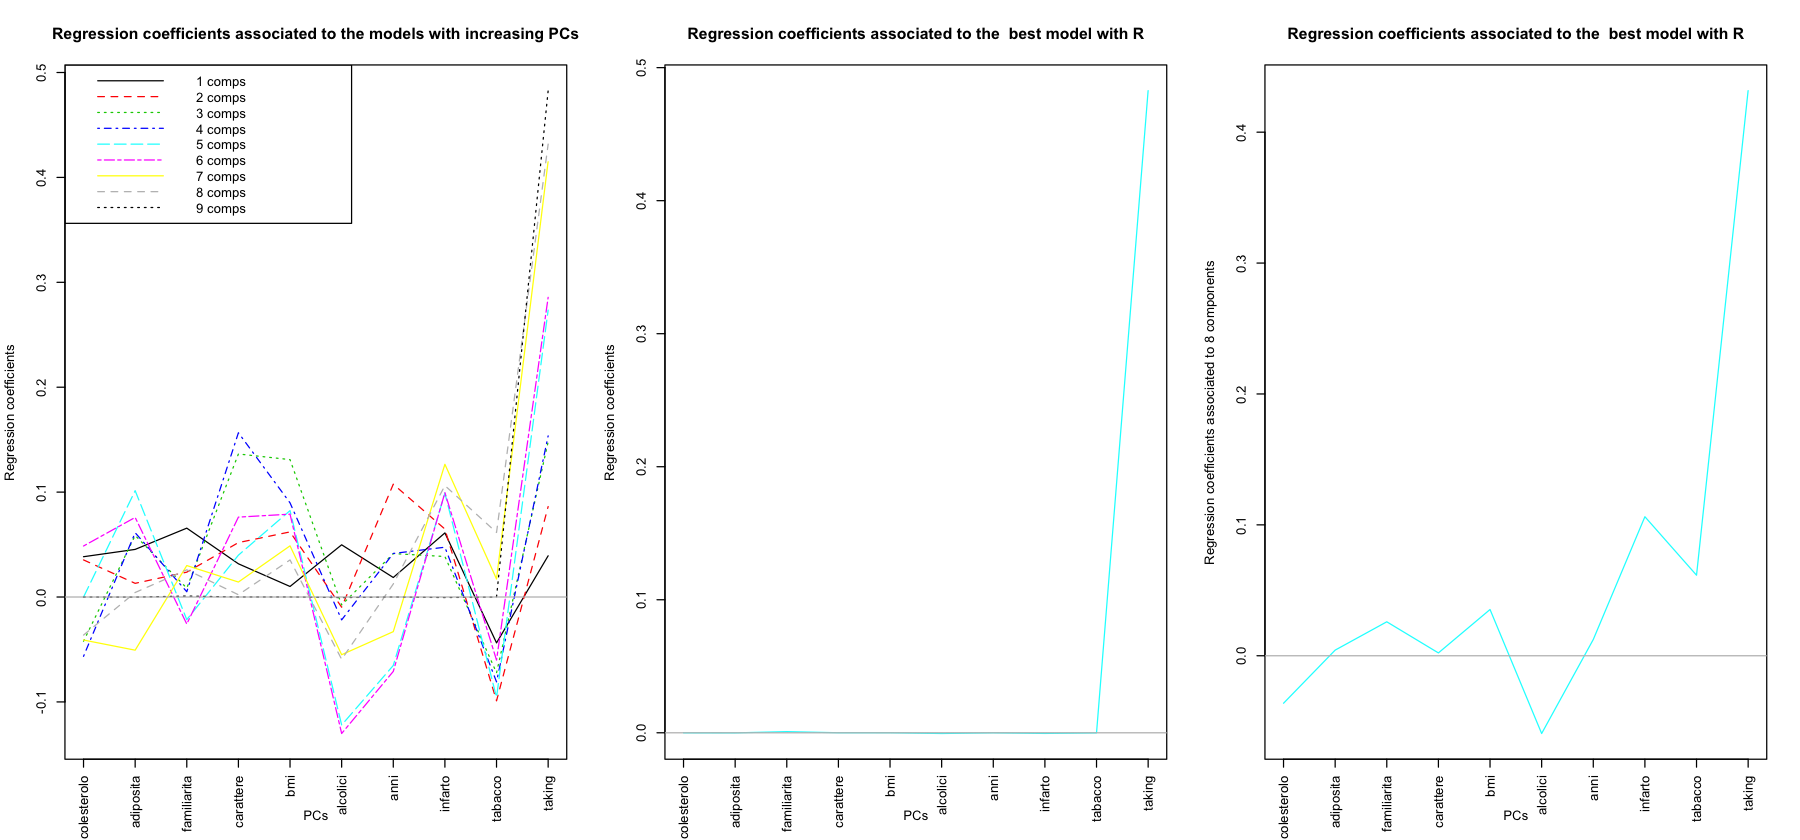

In [150]:
#plot

par(mfrow=c(1,3))
options(repr.plot.width = 15, repr.plot.height = 7)
coefplot(m.pcr, ncomp=1:selectNcomp(m.pcr, method='onesigma', ncomp=10), legendpos='topleft', main='',
        xlab='PCs', ylab='Regression coefficients',xaxt="n")
axis(1, at=1:10, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)


title("Regression coefficients associated to the models with increasing PCs")

coefplot(m.pcr, ncomp=9, main='', xlab='PCs', ylab='Regression coefficients',col="cyan",xaxt="n")
title("Regression coefficients associated to the  best model with R")
axis(1, at=1:10, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)



coefplot(m.pcr, ncomp=8, main='', xlab='PCs', ylab='Regression coefficients associated to 8 components',col="cyan",xaxt="n")
title("Regression coefficients associated to the  best model with R")
axis(1, at=1:10, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)

Let's evaluate the presence of of groups of observations or outliers through the scores. We do not see trends or anomalies in the groups. So the PCA  seems efficient for 9 PCs.

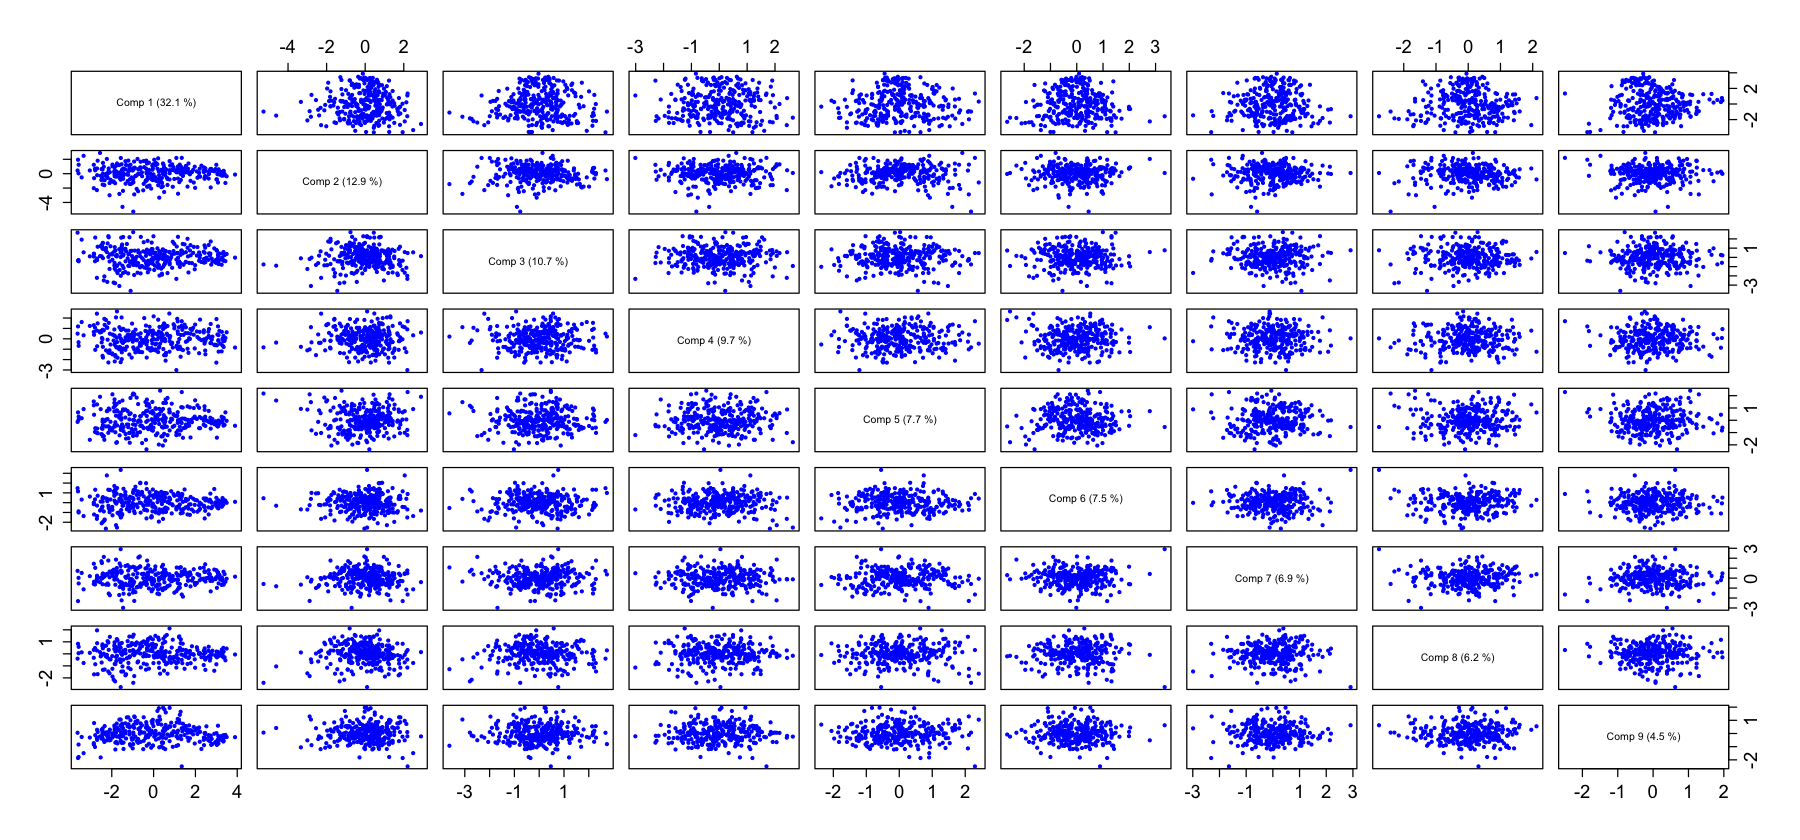

In [151]:
scoreplot(m.pcr, comps=1:selectNcomp(m.pcr, method='onesigma', ncomp=16), cex=0.5, cex.lab=1.4, cex.axis=1.4, pch=19,col="blue")


Let's compute MSE for 8 PCs.

In [156]:
MSEP(m.pcr, ncomp=8)

       (Intercept)  8 comps
CV          0.2338  0.01262
adjCV       0.2338  0.01225

### CONCLUSION POINT 2

Based the MSE  for the different methods are:

- 0.15 for Ridge
- 0.15 for Lasso
- 0.012 for PCA (for 8 components)

So we can say that  based in MSE  PCA with 8 components is the best approach since it has got a small MSE and an higher explained deviance (94%).